In [1]:
# import the required packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder, CountFrequencyEncoder, RareLabelEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser,EqualWidthDiscretiser
from feature_engine.outliers import Winsorizer

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Build Clustering Models using Numerical Data

### 1.1 Data exploration and manipulation

In [2]:
df = pd.read_csv('Used_Car_Price.csv')

In [3]:
df.head(50)

,MAKE,MODEL,PRICE,YEAR,KILOMETER,FUEL TYPE,TRANSMISSION,COLOR,OWNER,SELLER TYPE,ENGINE CAPACITY,MAX POWER,MAX TORQUE,DRIVETRAIN,LENGTH,WIDTH,HEIGHT,SEATING CAPACITY,FUEL TANK CAPACITY
0,Honda,Amaze 1.2 VX i-VTEC,12625,2017,87150,Petrol,Manual,Grey,First,Corporate,1198.0,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,11250,2014,75000,Diesel,Manual,White,Second,Individual,1248.0,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,5500,2011,67000,Petrol,Manual,Maroon,First,Individual,1197.0,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,19975,2019,37500,Petrol,Manual,Red,First,Individual,1197.0,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],48750,2018,69000,Diesel,Manual,Grey,First,Individual,2393.0,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
5,Maruti Suzuki,Ciaz ZXi,16875,2017,73315,Petrol,Manual,Grey,First,Individual,1373.0,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0
6,Mercedes-Benz,CLA 200 Petrol Sport,47475,2015,47000,Petrol,Automatic,White,Second,Individual,1991.0,181 bhp @ 5500 rpm,300 Nm @ 1200 rpm,FWD,4630.0,1777.0,1432.0,5.0,NaN
7,BMW,X1 xDrive20d M Sport,66250,2017,75000,Diesel,Automatic,White,Second,Individual,1995.0,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,AWD,4439.0,1821.0,1612.0,5.0,51.0
8,Skoda,Octavia 1.8 TSI Style Plus AT [2017],34750,2017,56000,Petrol,Automatic,White,First,Individual,1798.0,177 bhp @ 5100 rpm,250 Nm @ 1250 rpm,FWD,4670.0,1814.0,1476.0,5.0,50.0
9,Nissan,Terrano XL (D),14375,2015,85000,Diesel,Manual,White,First,Individual,1461.0,84 bhp @ 3750 rpm,200 Nm @ 1900 rpm,FWD,4331.0,1822.0,1671.0,5.0,50.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MAKE                2059 non-null   object 
 1   MODEL               2059 non-null   object 
 2   PRICE               2059 non-null   int64  
 3   YEAR                2059 non-null   int64  
 4   KILOMETER           2059 non-null   int64  
 5   FUEL TYPE           2059 non-null   object 
 6   TRANSMISSION        2059 non-null   object 
 7   COLOR               2059 non-null   object 
 8   OWNER               2059 non-null   object 
 9   SELLER TYPE         2059 non-null   object 
 10  ENGINE CAPACITY     1979 non-null   float64
 11  MAX POWER           1979 non-null   object 
 12  MAX TORQUE          1979 non-null   object 
 13  DRIVETRAIN          1923 non-null   object 
 14  LENGTH              1995 non-null   float64
 15  WIDTH               1995 non-null   float64
 16  HEIGHT

In [5]:
df.isnull().sum()

MAKE                    0
MODEL                   0
PRICE                   0
YEAR                    0
KILOMETER               0
FUEL TYPE               0
TRANSMISSION            0
COLOR                   0
OWNER                   0
SELLER TYPE             0
ENGINE CAPACITY        80
MAX POWER              80
MAX TORQUE             80
DRIVETRAIN            136
LENGTH                 64
WIDTH                  64
HEIGHT                 64
SEATING CAPACITY       64
FUEL TANK CAPACITY    113
dtype: int64

In [6]:
df[['MAX POWER', 'MAX TORQUE', 'DRIVETRAIN', 'LENGTH', 'WIDTH', 'HEIGHT',
   'SEATING CAPACITY', 'FUEL TANK CAPACITY']].isnull().mean().sort_values()

LENGTH                0.031083
WIDTH                 0.031083
HEIGHT                0.031083
SEATING CAPACITY      0.031083
MAX POWER             0.038854
MAX TORQUE            0.038854
FUEL TANK CAPACITY    0.054881
DRIVETRAIN            0.066051
dtype: float64

In [7]:
df.dropna(subset=['LENGTH'], inplace=True)
df[['MAX POWER', 'MAX TORQUE', 'DRIVETRAIN', 'LENGTH', 'WIDTH', 'HEIGHT',
   'SEATING CAPACITY', 'FUEL TANK CAPACITY']].isnull().sum()

MAX POWER             16
MAX TORQUE            16
DRIVETRAIN            72
LENGTH                 0
WIDTH                  0
HEIGHT                 0
SEATING CAPACITY       0
FUEL TANK CAPACITY    49
dtype: int64

In [8]:
nan_rows = df[df.isna().any(axis=1)]
nan_rows.head(20)

,MAKE,MODEL,PRICE,YEAR,KILOMETER,FUEL TYPE,TRANSMISSION,COLOR,OWNER,SELLER TYPE,ENGINE CAPACITY,MAX POWER,MAX TORQUE,DRIVETRAIN,LENGTH,WIDTH,HEIGHT,SEATING CAPACITY,FUEL TANK CAPACITY
6,Mercedes-Benz,CLA 200 Petrol Sport,47475,2015,47000,Petrol,Automatic,White,Second,Individual,1991.0,181 bhp @ 5500 rpm,300 Nm @ 1200 rpm,FWD,4630.0,1777.0,1432.0,5.0,NaN
93,BMW,X5 xDrive30d Pure Experience (5 Seater),73750,2015,84700,Diesel,Automatic,Black,Second,Individual,2993.0,258 bhp @ 4000 rpm,560 Nm @ 1500 rpm,AWD,4886.0,1938.0,1762.0,5.0,NaN
117,Hyundai,Santro GL LPG,3000,2009,48500,LPG,Manual,Grey,Fourth,Individual,1086.0,63@5500,89@3000,NaN,3565.0,1525.0,1590.0,5.0,35.0
127,Tata,Nexon EV XZ Plus,34375,2021,16000,Electric,Automatic,White,First,Individual,NaN,NaN,NaN,FWD,3993.0,1811.0,1606.0,5.0,NaN
134,BMW,5-Series 520d Sedan,37250,2013,195000,Diesel,Automatic,White,First,Individual,1995.0,184 bhp @ 4000 rpm,380 Nm @ 1750 rpm,RWD,4899.0,2094.0,1464.0,5.0,NaN
162,MG,Hector Sharp 1.5 DCT Petrol [2019-2020],43225,2020,27000,Petrol,Automatic,Silver,First,Individual,1451.0,141 bhp @ 5000 rpm,250 Nm @ 1600 rpm,NaN,4655.0,1835.0,1760.0,5.0,60.0
177,Maruti Suzuki,Wagon R VXi,8750,2013,45000,Petrol,Manual,White,First,Individual,998.0,68@6200,90@3500,NaN,3539.0,1495.0,1700.0,5.0,35.0
180,BMW,5-Series 520d Sedan,31250,2012,78000,Diesel,Automatic,Black,First,Individual,1995.0,184 bhp @ 4000 rpm,380 Nm @ 1750 rpm,RWD,4899.0,2094.0,1464.0,5.0,NaN
192,Toyota,Innova 2.5 G4 7 STR,16125,2013,76000,Diesel,Manual,Grey,Second,Individual,2494.0,102@5600,200@1400,NaN,4555.0,1770.0,1755.0,7.0,55.0
200,BMW,X5 xDrive 30d M Sport,74375,2015,86999,Diesel,Automatic,Yellow,First,Individual,2993.0,258 bhp @ 4000 rpm,560 Nm @ 1500 rpm,AWD,4886.0,1938.0,1762.0,5.0,NaN


In [9]:
# Conditionally fill NaNs for electric vehicles only
electric_mask = df['FUEL TYPE'] == 'Electric'
df.loc[electric_mask] = df.loc[electric_mask].fillna(0)
df[df['FUEL TYPE'] == 'Electric']

,MAKE,MODEL,PRICE,YEAR,KILOMETER,FUEL TYPE,TRANSMISSION,COLOR,OWNER,SELLER TYPE,ENGINE CAPACITY,MAX POWER,MAX TORQUE,DRIVETRAIN,LENGTH,WIDTH,HEIGHT,SEATING CAPACITY,FUEL TANK CAPACITY
127,Tata,Nexon EV XZ Plus,34375,2021,16000,Electric,Automatic,White,First,Individual,0.0,0,0,FWD,3993.0,1811.0,1606.0,5.0,0.0
338,Tata,Nexon EV XZ Plus,38750,2020,48400,Electric,Automatic,White,First,Individual,0.0,0,0,FWD,3993.0,1811.0,1606.0,5.0,0.0
639,Tata,Tigor EV XZ Plus,31875,2021,18000,Electric,Automatic,Grey,First,Individual,0.0,0,0,FWD,3993.0,1677.0,1532.0,5.0,0.0
898,Tata,Tigor EV XZ Plus,31250,2021,3000,Electric,Automatic,Green,First,Individual,0.0,0,0,FWD,3993.0,1677.0,1532.0,5.0,0.0
909,Tata,Nexon EV XZ Plus,36250,2022,5000,Electric,Automatic,Blue,First,Individual,0.0,0,0,FWD,3993.0,1811.0,1606.0,5.0,0.0
1312,Tata,Nexon EV XZ Plus,37125,2020,10000,Electric,Automatic,Blue,First,Individual,0.0,0,0,FWD,3993.0,1811.0,1606.0,5.0,0.0
1906,MG,ZS EV Exclusive [2020-2021],52500,2020,38500,Electric,Automatic,Blue,First,Individual,0.0,0,0,FWD,4314.0,1809.0,1620.0,5.0,0.0


In [10]:
df.columns = df.columns.str.strip()  # Remove whitespaces from column names

# Fill NaN values in numerical columns with mean
numerical_columns = ['ENGINE CAPACITY', 'FUEL TANK CAPACITY']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Fill NaN values in categorical columns with mode
categorical_columns = ['DRIVETRAIN', 'MAX POWER', 'MAX TORQUE']
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [11]:
df.isnull().sum()

MAKE                  0
MODEL                 0
PRICE                 0
YEAR                  0
KILOMETER             0
FUEL TYPE             0
TRANSMISSION          0
COLOR                 0
OWNER                 0
SELLER TYPE           0
ENGINE CAPACITY       0
MAX POWER             0
MAX TORQUE            0
DRIVETRAIN            0
LENGTH                0
WIDTH                 0
HEIGHT                0
SEATING CAPACITY      0
FUEL TANK CAPACITY    0
dtype: int64

In [12]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

PRICE


C:\Users\Jammie99\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


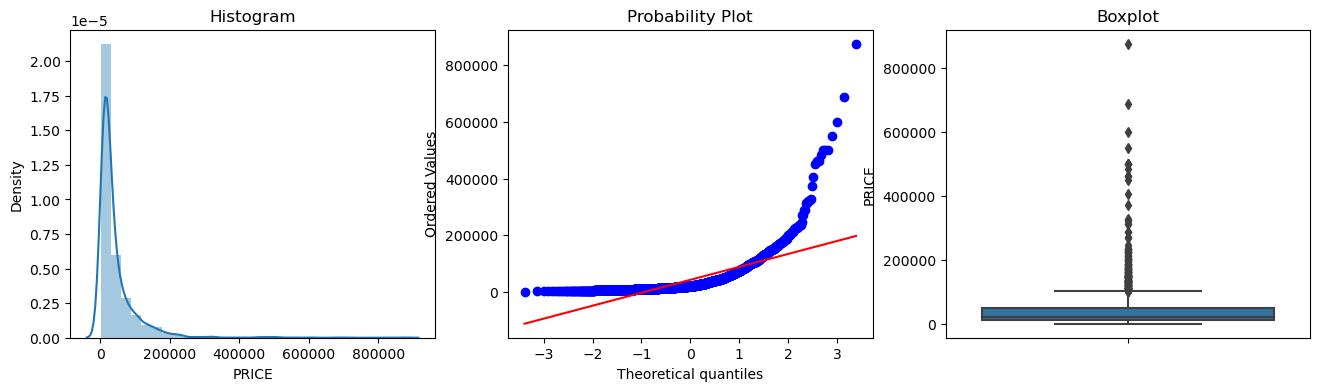

YEAR


C:\Users\Jammie99\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


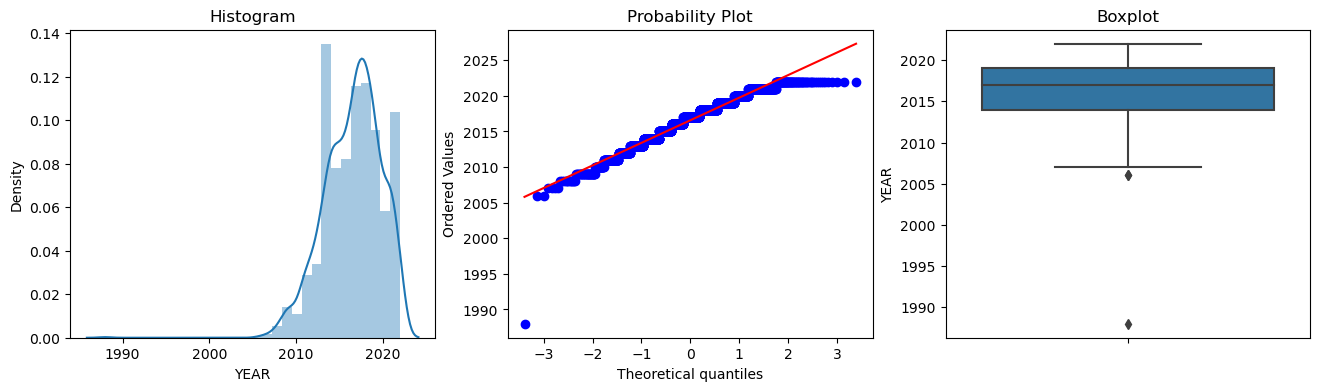

KILOMETER


C:\Users\Jammie99\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


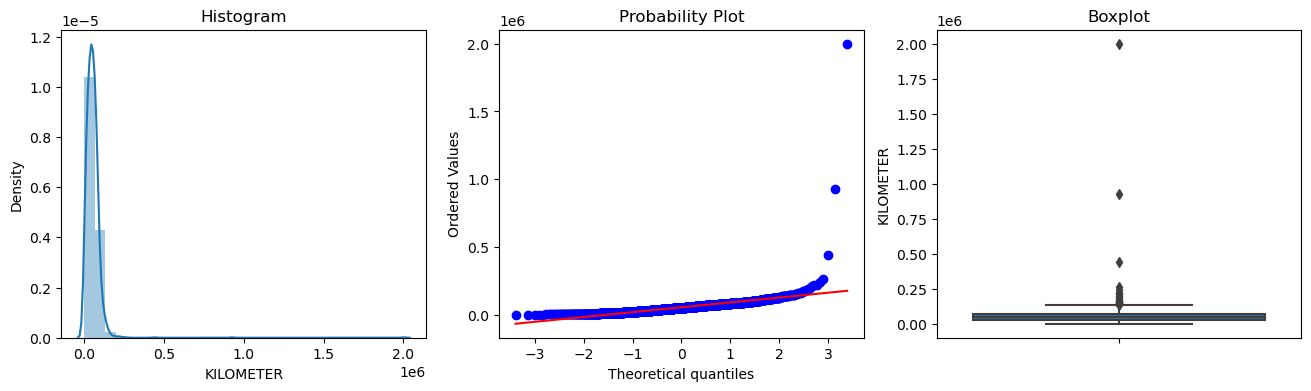

ENGINE CAPACITY


C:\Users\Jammie99\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


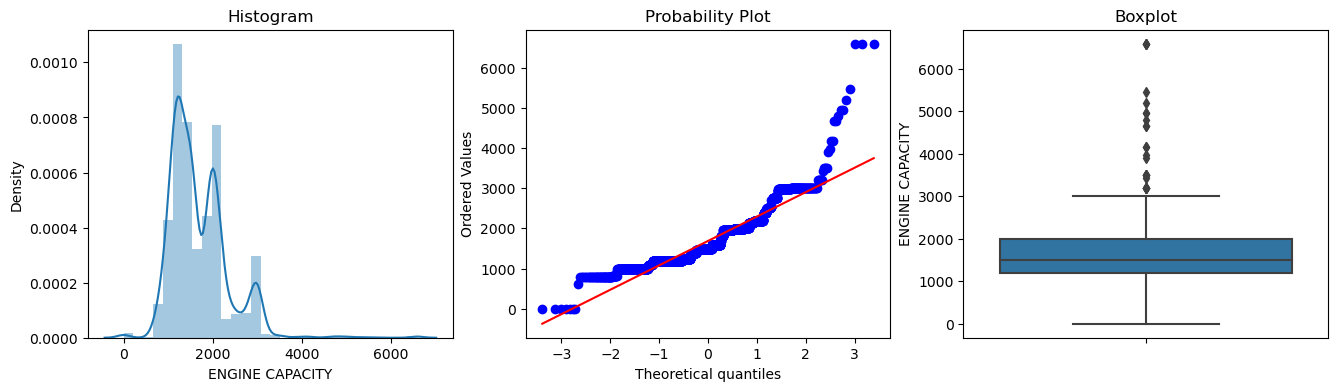

LENGTH


C:\Users\Jammie99\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


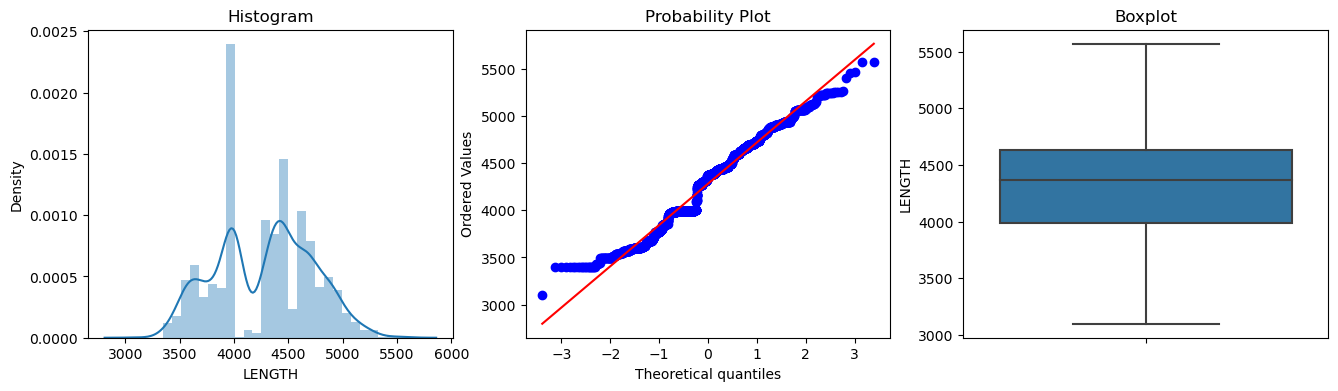

WIDTH


C:\Users\Jammie99\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


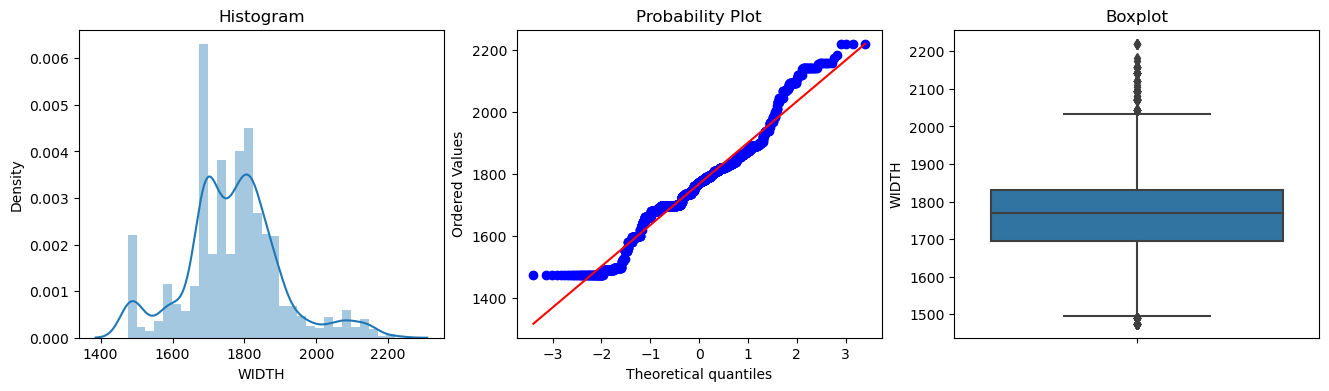

HEIGHT


C:\Users\Jammie99\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


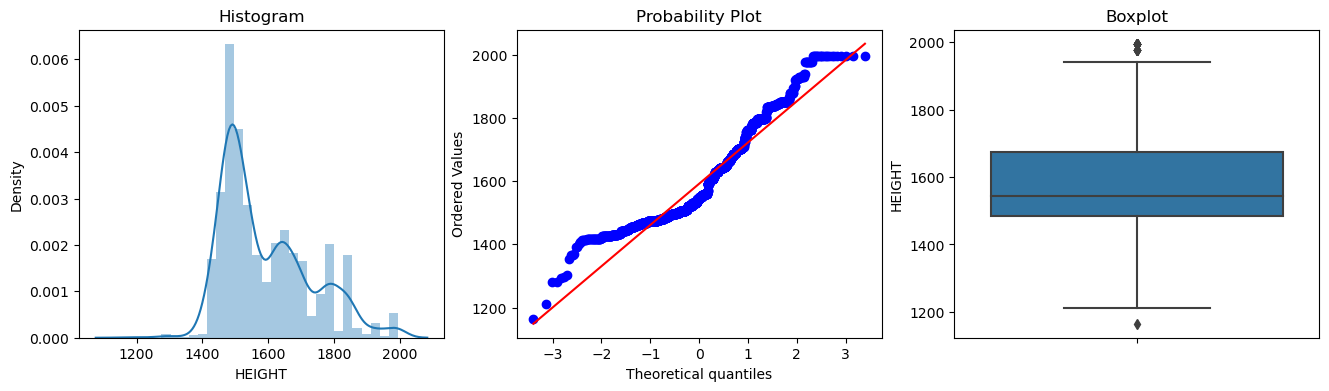

SEATING CAPACITY


C:\Users\Jammie99\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


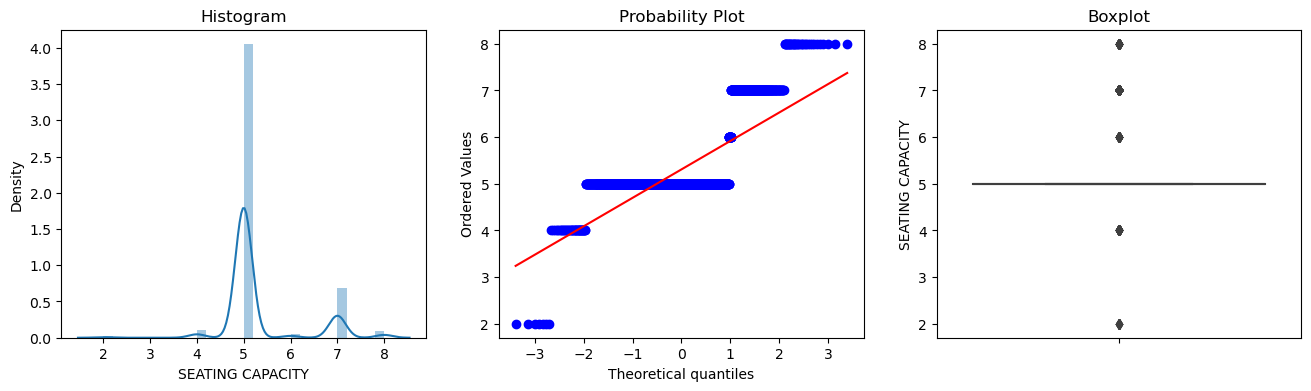

FUEL TANK CAPACITY


C:\Users\Jammie99\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


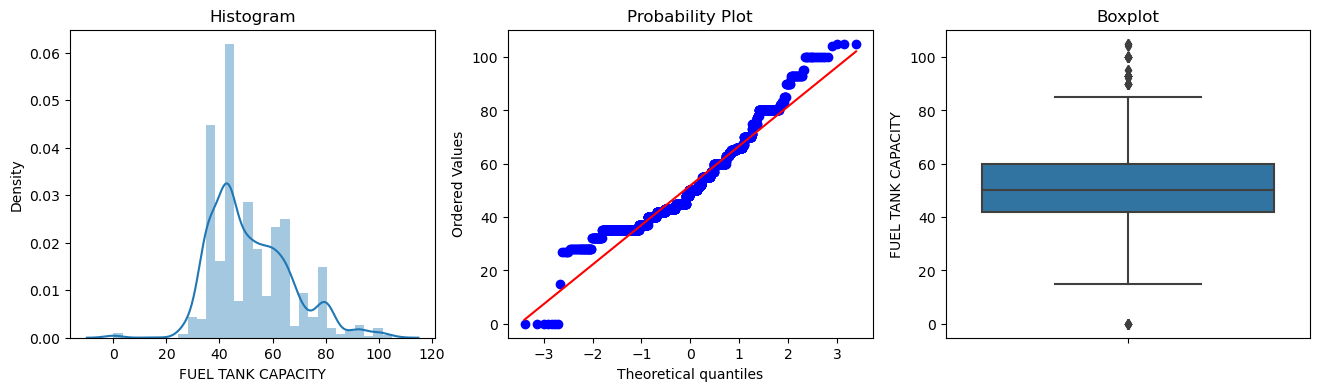

In [13]:
num_col = ['PRICE','YEAR','KILOMETER','ENGINE CAPACITY','LENGTH','WIDTH','HEIGHT','SEATING CAPACITY','FUEL TANK CAPACITY']
for i in num_col:
    print(i)
    diagnostic_plots(df, i)

In [14]:
def outlier_row(column_name):
    # Calculate the z-scores for the column
    z_scores = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())

    # Set a threshold for identifying outliers (e.g., z-score > 3)
    outlier_threshold = 3

    # Find the rows with outliers
    outlier_rows = df[z_scores > outlier_threshold]
    return outlier_rows

In [15]:
df.describe()

,PRICE,YEAR,KILOMETER,ENGINE CAPACITY,LENGTH,WIDTH,HEIGHT,SEATING CAPACITY,FUEL TANK CAPACITY
count,1995.000000,1995.000000,1.995000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000
mean,42912.581454,2016.565915,5.392515e+04,1686.609768,4280.860652,1767.991980,1591.735338,5.306266,51.815822
std,61010.523952,3.235963,5.799132e+04,648.916662,442.458507,135.265825,136.073956,0.822170,15.237018
min,1225.000000,1988.000000,0.000000e+00,0.000000,3099.000000,1475.000000,1165.000000,2.000000,0.000000
25%,12350.000000,2014.000000,2.859200e+04,1197.000000,3985.000000,1695.000000,1485.000000,5.000000,42.000000
50%,21000.000000,2017.000000,5.000000e+04,1498.000000,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,48750.000000,2019.000000,7.200000e+04,1995.000000,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,875000.000000,2022.000000,2.000000e+06,6592.000000,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [16]:
outlier_row("YEAR")

,MAKE,MODEL,PRICE,YEAR,KILOMETER,FUEL TYPE,TRANSMISSION,COLOR,OWNER,SELLER TYPE,ENGINE CAPACITY,MAX POWER,MAX TORQUE,DRIVETRAIN,LENGTH,WIDTH,HEIGHT,SEATING CAPACITY,FUEL TANK CAPACITY
68,Honda,Civic 1.8S MT,4750,2006,130000,Petrol,Manual,Maroon,Third,Individual,1799.0,130 bhp @ 6300 rpm,171.62 Nm @ 4300 rpm,FWD,4545.0,1750.0,1450.0,5.0,50.0
164,Honda,CR-V 2.4 AT,6250,2006,119300,Petrol,Automatic,Black,Third,Individual,2354.0,152@6000,215@3600,AWD,4630.0,1780.0,1710.0,5.0,58.0
995,Mercedes-Benz,E-Class E 200 Avantgarde,32500,1988,71000,Petrol,Automatic,Red,Third,Individual,1991.0,181 bhp @ 5500 rpm,300 Nm @ 1200 rpm,RWD,5063.0,1860.0,1494.0,5.0,80.0


In [17]:
outlier_row("KILOMETER")

,MAKE,MODEL,PRICE,YEAR,KILOMETER,FUEL TYPE,TRANSMISSION,COLOR,OWNER,SELLER TYPE,ENGINE CAPACITY,MAX POWER,MAX TORQUE,DRIVETRAIN,LENGTH,WIDTH,HEIGHT,SEATING CAPACITY,FUEL TANK CAPACITY
733,Audi,A6 3.0 TDI quattro Premium,41250,2012,240000,Diesel,Automatic,White,First,Individual,2967.0,245 bhp @ 4000 rpm,500 Nm @ 1400 rpm,AWD,4915.0,1874.0,1455.0,5.0,75.0
1125,Renault,Duster 110 PS RXZ 4X2 MT Diesel,11250,2016,2000000,Diesel,Manual,White,First,Individual,1461.0,108 bhp @ 3900 rpm,248 Nm @ 2250 rpm,FWD,4315.0,1822.0,1695.0,5.0,50.0
1515,Hyundai,Creta SX 1.6 AT CRDi,31000,2018,440000,Diesel,Automatic,Grey,First,Individual,1582.0,126 bhp @ 4000 rpm,260 Nm @ 1500 rpm,FWD,4270.0,1780.0,1665.0,5.0,55.0
1866,Hyundai,Verna 1.6 CRDI SX,23125,2018,925000,Diesel,Manual,White,First,Individual,1582.0,126 bhp @ 4000 rpm,260 Nm @ 1900 rpm,FWD,4375.0,1700.0,1475.0,5.0,43.0
1992,Toyota,Innova 2.0 G1 BS-IV,13875,2010,261236,Petrol,Manual,Silver,First,Individual,1998.0,136@5600,182@4000,FWD,4555.0,1770.0,1755.0,8.0,55.0


In [18]:
outlier_row("PRICE")

,MAKE,MODEL,PRICE,YEAR,KILOMETER,FUEL TYPE,TRANSMISSION,COLOR,OWNER,SELLER TYPE,ENGINE CAPACITY,MAX POWER,MAX TORQUE,DRIVETRAIN,LENGTH,WIDTH,HEIGHT,SEATING CAPACITY,FUEL TANK CAPACITY
95,Porsche,Cayenne Coupe Platinum Edition,405000,2022,2766,Petrol,Automatic,Blue,First,Individual,2995.0,335 bhp @ 5300 rpm,450 Nm @ 1340 rpm,AWD,4931.0,1983.0,1676.0,4.0,75.000000
160,Mercedes-Benz,S-Class Maybach S 500,287500,2016,27000,Petrol,Automatic,Blue,First,Individual,4663.0,453 bhp @ 5250 rpm,700 Nm @ 1800 rpm,RWD,5453.0,1899.0,1498.0,4.0,70.000000
259,Land Rover,Range Rover Sport SE 2.0 Petrol,312500,2022,22010,Petrol,Automatic,White,First,Individual,1997.0,296 bhp @ 5500 rpm,400 Nm @ 1500 rpm,AWD,4879.0,2073.0,1803.0,5.0,104.000000
305,Porsche,911 Carrera 4,232500,2019,9000,Petrol,Automatic,Blue,First,Corporate,3436.0,325 bhp @ 7400 rpm,390 Nm @ 5600 rpm,AWD,4491.0,1852.0,1304.0,4.0,68.000000
442,Mercedes-Benz,S-Class Maybach S 560,462500,2021,21000,Petrol,Automatic,Black,First,Individual,3982.0,463 bhp @ 5250 rpm,700 Nm @ 2000 rpm,RWD,5462.0,1899.0,1498.0,4.0,70.000000
472,Mercedes-Benz,GLE 300d 4MATIC LWB,234750,2022,14000,Diesel,Automatic,White,First,Individual,1950.0,241 bhp @ 4200 rpm,500 Nm @ 1600 rpm,AWD,4924.0,2157.0,1772.0,5.0,93.000000
483,Ferrari,488 GTB,875000,2018,9500,Petrol,Automatic,Black,First,Individual,3902.0,660 bhp @ 8000 rpm,760 Nm @ 3000 rpm,RWD,4568.0,1952.0,1213.0,2.0,78.000000
510,Lamborghini,Huracan LP 610-4,600000,2016,6000,Petrol,Automatic,Blue,First,Individual,5204.0,602 bhp @ 8250 rpm,560 Nm @ 6500 rpm,AWD,4459.0,1924.0,1165.0,2.0,51.815822
542,Mercedes-Benz,GLS 400d 4MATIC,325000,2021,20000,Diesel,Automatic,Blue,First,Individual,2925.0,326 bhp @ 3600 rpm,700 Nm @ 1200 rpm,AWD,5207.0,2157.0,1823.0,7.0,90.000000
582,Land Rover,Range Rover 3.0 V6 Diesel Vogue,550000,2019,35000,Diesel,Automatic,Blue,First,Individual,2993.0,244 bhp @ 4000 rpm,600 Nm @ 2000 rpm,AWD,4999.0,2220.0,1835.0,5.0,105.000000


In [19]:
windsorizer = Winsorizer(capping_method='gaussian',
                          tail='both',
                          fold=3,
                          variables=['KILOMETER','YEAR','PRICE'])

windsorizer.fit(df)
df = windsorizer.transform(df)

In [20]:
df.head(50)

,MAKE,MODEL,PRICE,YEAR,KILOMETER,FUEL TYPE,TRANSMISSION,COLOR,OWNER,SELLER TYPE,ENGINE CAPACITY,MAX POWER,MAX TORQUE,DRIVETRAIN,LENGTH,WIDTH,HEIGHT,SEATING CAPACITY,FUEL TANK CAPACITY
0,Honda,Amaze 1.2 VX i-VTEC,12625.0,2017.0,87150.0,Petrol,Manual,Grey,First,Corporate,1198.0,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.000000
1,Maruti Suzuki,Swift DZire VDI,11250.0,2014.0,75000.0,Diesel,Manual,White,Second,Individual,1248.0,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.000000
2,Hyundai,i10 Magna 1.2 Kappa2,5500.0,2011.0,67000.0,Petrol,Manual,Maroon,First,Individual,1197.0,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.000000
3,Toyota,Glanza G,19975.0,2019.0,37500.0,Petrol,Manual,Red,First,Individual,1197.0,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.000000
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],48750.0,2018.0,69000.0,Diesel,Manual,Grey,First,Individual,2393.0,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.000000
5,Maruti Suzuki,Ciaz ZXi,16875.0,2017.0,73315.0,Petrol,Manual,Grey,First,Individual,1373.0,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.000000
6,Mercedes-Benz,CLA 200 Petrol Sport,47475.0,2015.0,47000.0,Petrol,Automatic,White,Second,Individual,1991.0,181 bhp @ 5500 rpm,300 Nm @ 1200 rpm,FWD,4630.0,1777.0,1432.0,5.0,51.815822
7,BMW,X1 xDrive20d M Sport,66250.0,2017.0,75000.0,Diesel,Automatic,White,Second,Individual,1995.0,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,AWD,4439.0,1821.0,1612.0,5.0,51.000000
8,Skoda,Octavia 1.8 TSI Style Plus AT [2017],34750.0,2017.0,56000.0,Petrol,Automatic,White,First,Individual,1798.0,177 bhp @ 5100 rpm,250 Nm @ 1250 rpm,FWD,4670.0,1814.0,1476.0,5.0,50.000000
9,Nissan,Terrano XL (D),14375.0,2015.0,85000.0,Diesel,Manual,White,First,Individual,1461.0,84 bhp @ 3750 rpm,200 Nm @ 1900 rpm,FWD,4331.0,1822.0,1671.0,5.0,50.000000


In [21]:
# Extract numeric values and units using regular expressions
df_new = df.copy()
df_new['MAX POWER'] = df_new['MAX POWER'].str.replace('bhp', '')
df_new['MAX POWER'] = df_new['MAX POWER'].str.replace('rpm', '')
df_new['MAX TORQUE'] = df_new['MAX TORQUE'].str.replace('Nm', '')
df_new['MAX TORQUE'] = df_new['MAX TORQUE'].str.replace('rpm', '')

# Extract Max Power (bhp) and Max Power (rpm)
df_new[['Max Power (bhp)', 'Max Power (rpm)']] = df_new['MAX POWER'].str.split('@', expand=True)
# Extract Max Torque (Nm) and Max Torque (rpm)
df_new[['Max Torque (Nm)', 'Max Torque (rpm)']] = df_new['MAX TORQUE'].str.split('@', expand=True)

# Convert the extracted values to numeric data types
df_new['Max Power (bhp)'] = pd.to_numeric(df_new['Max Power (bhp)'])
df_new['Max Power (rpm)'] = pd.to_numeric(df_new['Max Power (rpm)'])
df_new['Max Torque (Nm)'] = pd.to_numeric(df_new['Max Torque (Nm)'])
df_new['Max Torque (rpm)'] = pd.to_numeric(df_new['Max Torque (rpm)'])

# Fill NaN values with 0
df_new['Max Power (bhp)'].fillna(0, inplace=True)
df_new['Max Power (rpm)'].fillna(0, inplace=True)
df_new['Max Torque (Nm)'].fillna(0, inplace=True)
df_new['Max Torque (rpm)'].fillna(0, inplace=True)

In [22]:
df_new.head()

,MAKE,MODEL,PRICE,YEAR,KILOMETER,FUEL TYPE,TRANSMISSION,COLOR,OWNER,SELLER TYPE,...,DRIVETRAIN,LENGTH,WIDTH,HEIGHT,SEATING CAPACITY,FUEL TANK CAPACITY,Max Power (bhp),Max Power (rpm),Max Torque (Nm),Max Torque (rpm)
0,Honda,Amaze 1.2 VX i-VTEC,12625.0,2017.0,87150.0,Petrol,Manual,Grey,First,Corporate,...,FWD,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0000,4500.0
1,Maruti Suzuki,Swift DZire VDI,11250.0,2014.0,75000.0,Diesel,Manual,White,Second,Individual,...,FWD,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0000,2000.0
2,Hyundai,i10 Magna 1.2 Kappa2,5500.0,2011.0,67000.0,Petrol,Manual,Maroon,First,Individual,...,FWD,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,112.7619,4000.0
3,Toyota,Glanza G,19975.0,2019.0,37500.0,Petrol,Manual,Red,First,Individual,...,FWD,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0000,4200.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],48750.0,2018.0,69000.0,Diesel,Manual,Grey,First,Individual,...,RWD,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0000,1400.0


In [23]:
df_new['MAKE'].value_counts()

Maruti Suzuki    430
Hyundai          342
Mercedes-Benz    163
Honda            150
Toyota           130
BMW              119
Audi             119
Mahindra         118
Tata              57
Ford              48
Renault           43
Volkswagen        42
Skoda             40
Land Rover        32
Kia               23
Jeep              18
MG                17
Volvo             16
Nissan            15
Jaguar            13
Porsche           12
MINI              11
Datsun             8
Chevrolet          7
Lexus              5
Mitsubishi         4
Ssangyong          3
Rolls-Royce        3
Isuzu              2
Fiat               2
Maserati           1
Ferrari            1
Lamborghini        1
Name: MAKE, dtype: int64

In [24]:
# Specify the column and the threshold for renaming unique values
column_name = 'MAKE'
threshold = 30

# Calculate the counts of unique values in the column
value_counts = df_new[column_name].value_counts()

# Find the values that have less than the threshold rows
values_to_rename = value_counts[value_counts < threshold].index

# Rename the values to 'Others' in the DataFrame
df_new.loc[df_new[column_name].isin(values_to_rename), column_name] = 'Others'

df_new['MAKE'].value_counts()

Maruti Suzuki    430
Hyundai          342
Mercedes-Benz    163
Others           162
Honda            150
Toyota           130
BMW              119
Audi             119
Mahindra         118
Tata              57
Ford              48
Renault           43
Volkswagen        42
Skoda             40
Land Rover        32
Name: MAKE, dtype: int64

In [25]:
df_new['FUEL TYPE'].value_counts()

Diesel          1022
Petrol           906
CNG               50
Electric           7
LPG                5
Hybrid             3
CNG + CNG          1
Petrol + CNG       1
Name: FUEL TYPE, dtype: int64

In [26]:
data = {"FUEL_TYPE": ["Diesel","Petrol","CNG","Electric","LPG","Hybrid","CNG + CNG","Petrol + CNG","Petrol + LPG"]}

df_encoded = df_new.copy()

# Create one-hot encoded columns
df_encoded["Diesel"] = 0
df_encoded["Petrol"] = 0
df_encoded["CNG"] = 0
df_encoded["Electric"] = 0
df_encoded["LPG"] = 0
df_encoded["Hybrid"] = 0

# Iterate over each row
for i, row in df.iterrows():
    fuel_type = row["FUEL TYPE"]

    # Check fuel type and update one-hot encoded columns
    if "Diesel" in fuel_type:
        df_encoded.loc[i, "Diesel"] = 1
    if "Petrol" in fuel_type:
        df_encoded.loc[i, "Petrol"] = 1
    if "CNG" in fuel_type and "Petrol" not in fuel_type and "LPG" not in fuel_type and "Hybrid" not in fuel_type:
        df_encoded.loc[i, "CNG"] = 1
    if "Electric" in fuel_type:
        df_encoded.loc[i, "Electric"] = 1
    if "LPG" in fuel_type:
        df_encoded.loc[i, "LPG"] = 1
    if "Hybrid" in fuel_type:
        df_encoded.loc[i, "Hybrid"] = 1

In [27]:
df_encoded.head()

,MAKE,MODEL,PRICE,YEAR,KILOMETER,FUEL TYPE,TRANSMISSION,COLOR,OWNER,SELLER TYPE,...,Max Power (bhp),Max Power (rpm),Max Torque (Nm),Max Torque (rpm),Diesel,Petrol,CNG,Electric,LPG,Hybrid
0,Honda,Amaze 1.2 VX i-VTEC,12625.0,2017.0,87150.0,Petrol,Manual,Grey,First,Corporate,...,87.0,6000.0,109.0000,4500.0,0,1,0,0,0,0
1,Maruti Suzuki,Swift DZire VDI,11250.0,2014.0,75000.0,Diesel,Manual,White,Second,Individual,...,74.0,4000.0,190.0000,2000.0,1,0,0,0,0,0
2,Hyundai,i10 Magna 1.2 Kappa2,5500.0,2011.0,67000.0,Petrol,Manual,Maroon,First,Individual,...,79.0,6000.0,112.7619,4000.0,0,1,0,0,0,0
3,Toyota,Glanza G,19975.0,2019.0,37500.0,Petrol,Manual,Red,First,Individual,...,82.0,6000.0,113.0000,4200.0,0,1,0,0,0,0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],48750.0,2018.0,69000.0,Diesel,Manual,Grey,First,Individual,...,148.0,3400.0,343.0000,1400.0,1,0,0,0,0,0


In [28]:
df_encoded['OWNER'].value_counts()

First               1587
Second               347
Third                 37
UnRegistered Car      20
Fourth                 3
4 or More              1
Name: OWNER, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder

# Define the desired order of the categories
owner_order = ['UnRegistered Car','First', 'Second', 'Third', 'Fourth', '4 or More']

# Perform ordered ordinal encoding
df_encoded['OWNER'] = pd.Categorical(df_encoded['OWNER'], ordered=True, categories=owner_order)
df_encoded['OWNER'] = df_encoded['OWNER'].cat.codes

# Create a dictionary to store the reversed values and encoded values for each column
reversed_values = {}

# Create a new instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding and store the reversed values for each column
for column in ['MODEL','MAKE', 'TRANSMISSION', 'COLOR', 'SELLER TYPE', 'DRIVETRAIN']:
    encoded_labels = label_encoder.fit_transform(df_encoded[column])
    original_values = label_encoder.inverse_transform(encoded_labels)
    df_encoded[column] = encoded_labels
    reversed_values[column] = dict(zip(encoded_labels, original_values))

In [30]:
reversed_values['SELLER TYPE']

{1: 'Corporate', 2: 'Individual', 0: 'Commercial Registration'}

In [31]:
df_encoded = df_encoded.drop(columns=['MAX POWER', 'MAX TORQUE', 'FUEL TYPE'])
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 0 to 2058
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MAKE                1995 non-null   int32  
 1   MODEL               1995 non-null   int32  
 2   PRICE               1995 non-null   float64
 3   YEAR                1995 non-null   float64
 4   KILOMETER           1995 non-null   float64
 5   TRANSMISSION        1995 non-null   int32  
 6   COLOR               1995 non-null   int32  
 7   OWNER               1995 non-null   int8   
 8   SELLER TYPE         1995 non-null   int32  
 9   ENGINE CAPACITY     1995 non-null   float64
 10  DRIVETRAIN          1995 non-null   int32  
 11  LENGTH              1995 non-null   float64
 12  WIDTH               1995 non-null   float64
 13  HEIGHT              1995 non-null   float64
 14  SEATING CAPACITY    1995 non-null   float64
 15  FUEL TANK CAPACITY  1995 non-null   float64
 16  Max Po

In [32]:
df_encoded.head()

,MAKE,MODEL,PRICE,YEAR,KILOMETER,TRANSMISSION,COLOR,OWNER,SELLER TYPE,ENGINE CAPACITY,...,Max Power (bhp),Max Power (rpm),Max Torque (Nm),Max Torque (rpm),Diesel,Petrol,CNG,Electric,LPG,Hybrid
0,3,99,12625.0,2017.0,87150.0,1,7,1,1,1198.0,...,87.0,6000.0,109.0000,4500.0,0,1,0,0,0,0
1,7,773,11250.0,2014.0,75000.0,1,15,2,2,1248.0,...,74.0,4000.0,190.0000,2000.0,1,0,0,0,0,0
2,4,994,5500.0,2011.0,67000.0,1,8,1,2,1197.0,...,79.0,6000.0,112.7619,4000.0,0,1,0,0,0,0
3,13,474,19975.0,2019.0,37500.0,1,13,1,2,1197.0,...,82.0,6000.0,113.0000,4200.0,0,1,0,0,0,0
4,13,530,48750.0,2018.0,69000.0,1,7,1,2,2393.0,...,148.0,3400.0,343.0000,1400.0,1,0,0,0,0,0


### 1.2 K-Means Clustering

In [33]:
final_df = df_encoded.copy()

In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 0 to 2058
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MAKE                1995 non-null   int32  
 1   MODEL               1995 non-null   int32  
 2   PRICE               1995 non-null   float64
 3   YEAR                1995 non-null   float64
 4   KILOMETER           1995 non-null   float64
 5   TRANSMISSION        1995 non-null   int32  
 6   COLOR               1995 non-null   int32  
 7   OWNER               1995 non-null   int8   
 8   SELLER TYPE         1995 non-null   int32  
 9   ENGINE CAPACITY     1995 non-null   float64
 10  DRIVETRAIN          1995 non-null   int32  
 11  LENGTH              1995 non-null   float64
 12  WIDTH               1995 non-null   float64
 13  HEIGHT              1995 non-null   float64
 14  SEATING CAPACITY    1995 non-null   float64
 15  FUEL TANK CAPACITY  1995 non-null   float64
 16  Max Po

In [35]:
df_3d = final_df.iloc[:,[2,3,18]]
X =df_3d.values
#scaler = StandardScaler() 
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
df_3d.head()

,PRICE,YEAR,Max Torque (Nm)
0,12625.0,2017.0,109.0000
1,11250.0,2014.0,190.0000
2,5500.0,2011.0,112.7619
3,19975.0,2019.0,113.0000
4,48750.0,2018.0,343.0000


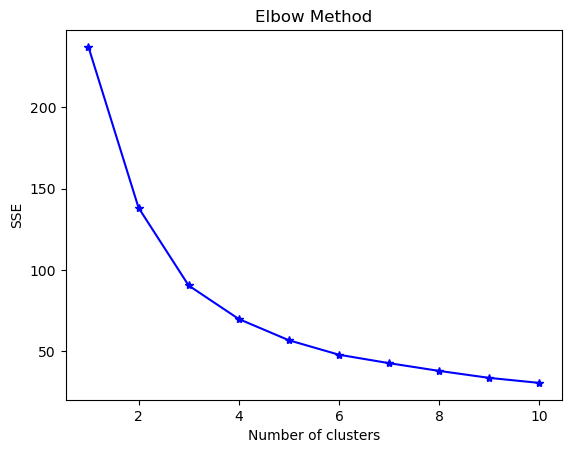

In [37]:
#Elbow Method to find the optimal K
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=50, random_state=1)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse, 'b-*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [38]:
# Build the model using the optimal n_cluster
kmeans = KMeans(n_clusters=4, n_init=50, random_state=1)
# Fit the model and assign each data point to the cluster
kmeans.fit(X_scaled)
y_pred = kmeans.fit_predict(X_scaled) # fit and then predict

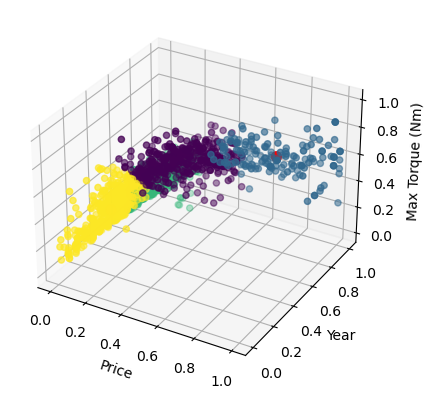

In [39]:
from mpl_toolkits import mplot3d

fig = plt.figure(20)
ax = plt.axes(projection='3d')
ax.scatter3D(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2], c=y_pred);
ax.scatter3D(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],kmeans.cluster_centers_[:, 2], s=50, c='red')

ax.set_xlabel('Price')
ax.set_ylabel('Year')
ax.set_zlabel('Max Torque (Nm)')
plt.show()

In [40]:
silhouette_score(X_scaled, y_pred)

0.38640339634492094

MAKE


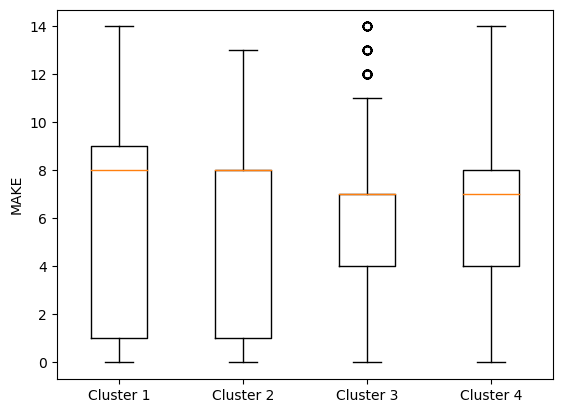

MODEL


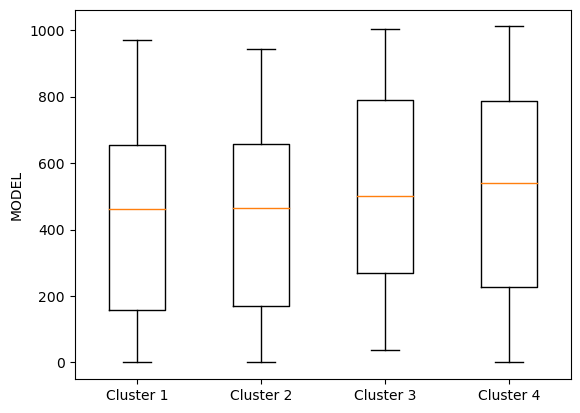

PRICE


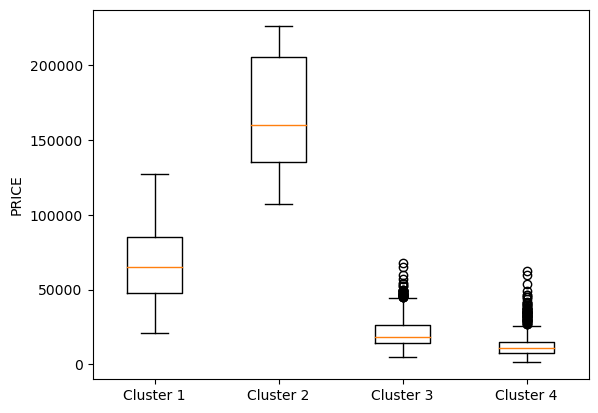

YEAR


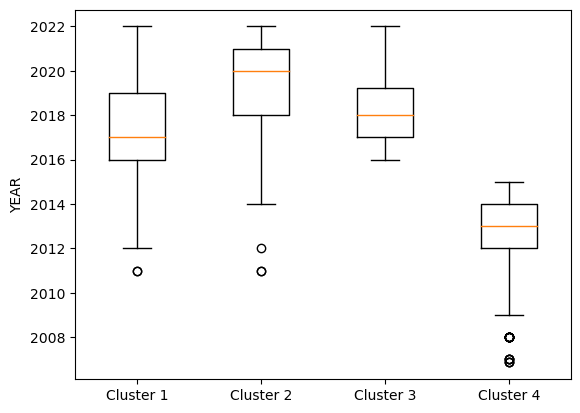

KILOMETER


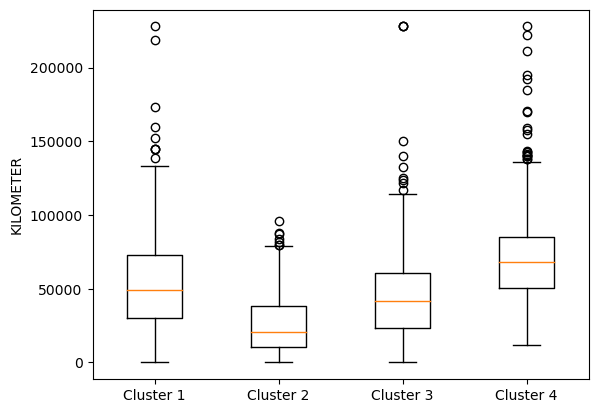

TRANSMISSION


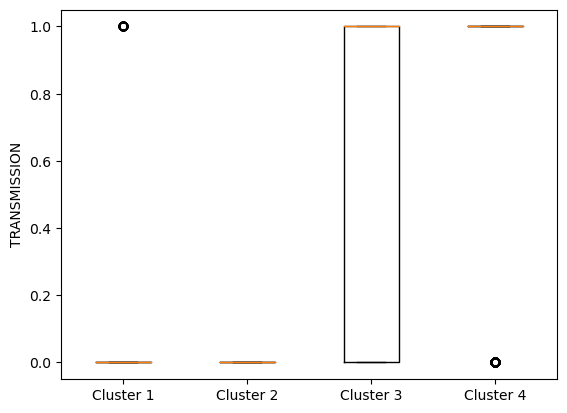

COLOR


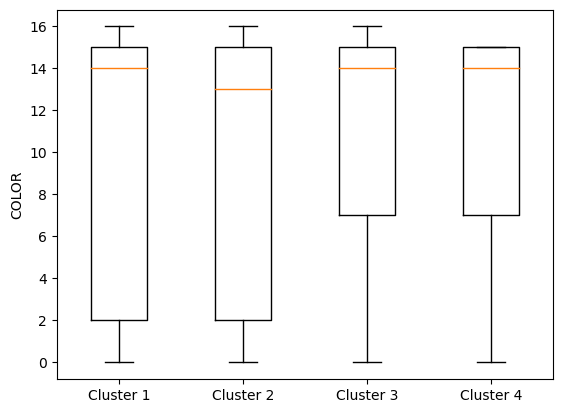

OWNER


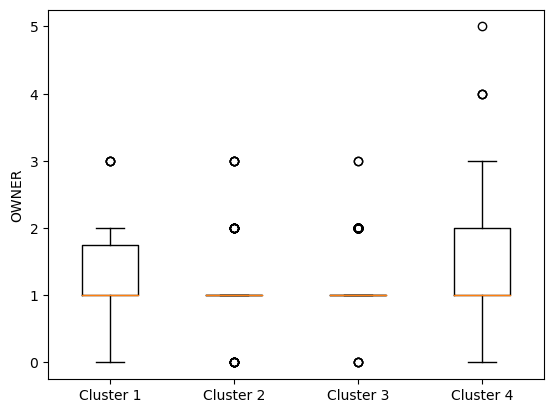

SELLER TYPE


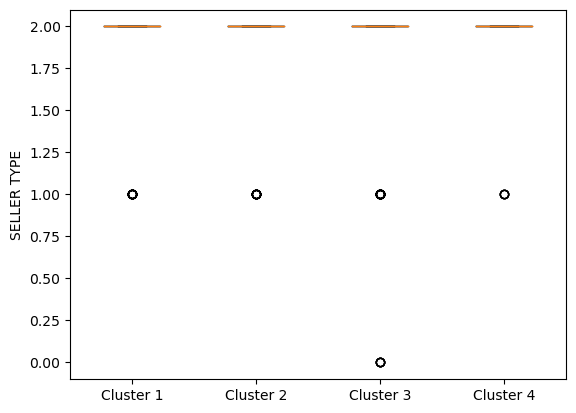

ENGINE CAPACITY


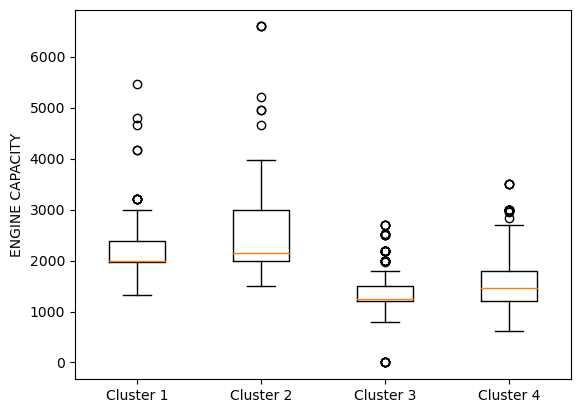

DRIVETRAIN


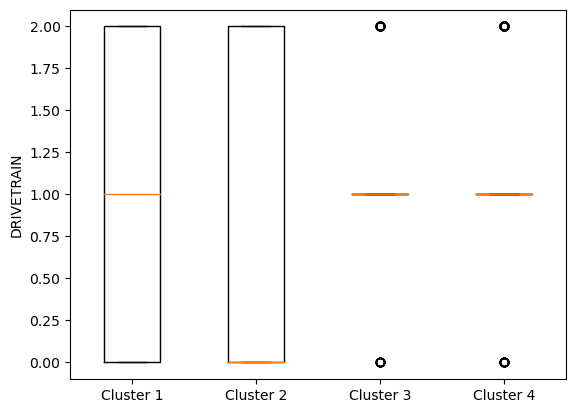

LENGTH


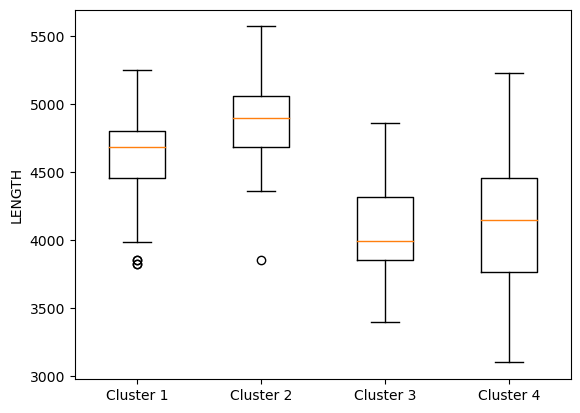

WIDTH


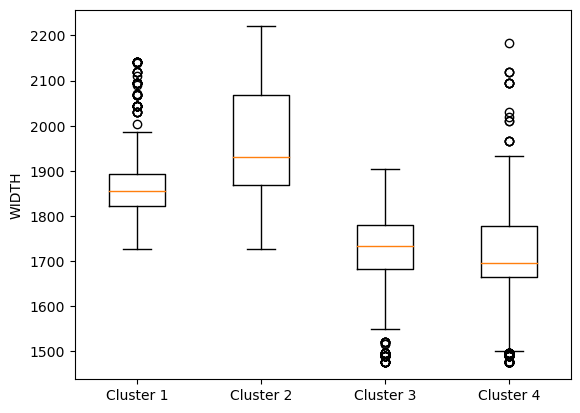

HEIGHT


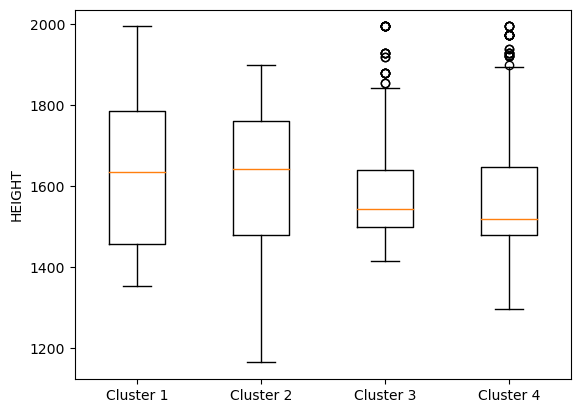

SEATING CAPACITY


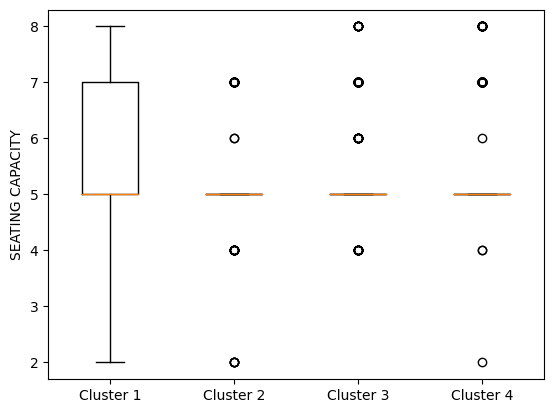

FUEL TANK CAPACITY


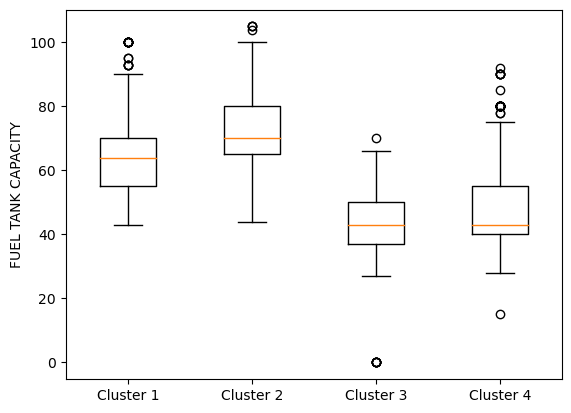

Max Power (bhp)


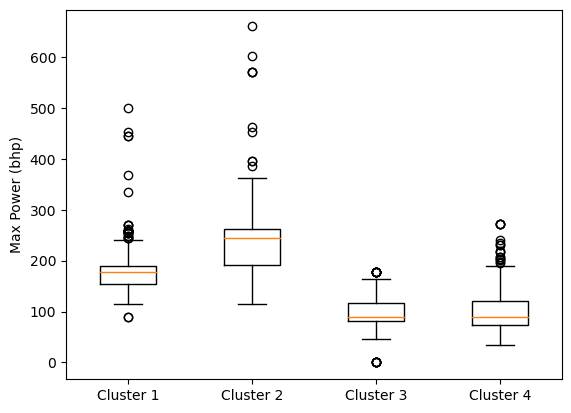

Max Power (rpm)


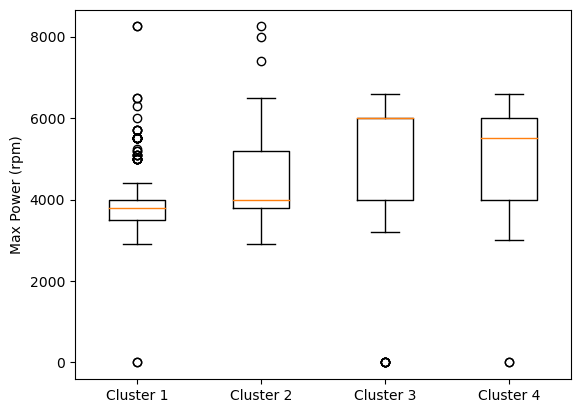

Max Torque (Nm)


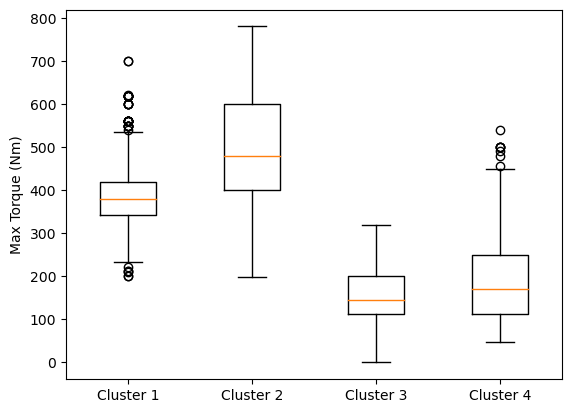

Max Torque (rpm)


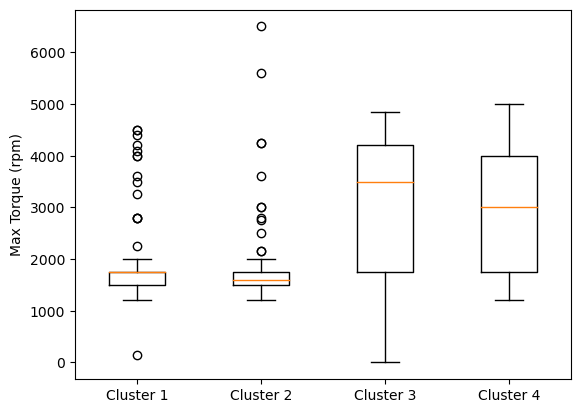

Diesel


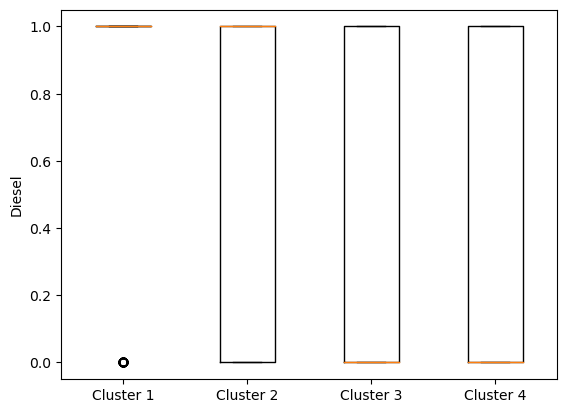

Petrol


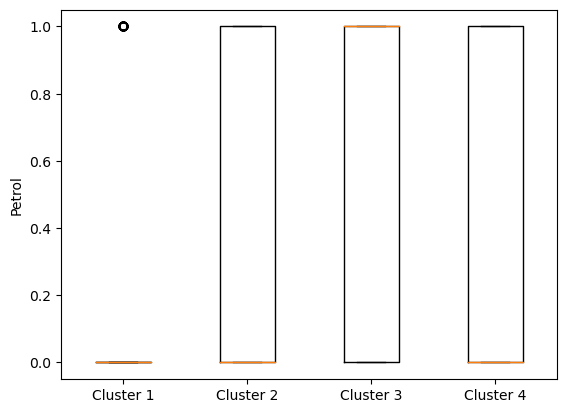

CNG


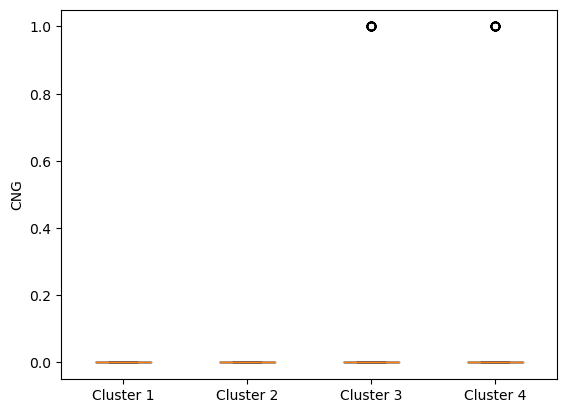

Electric


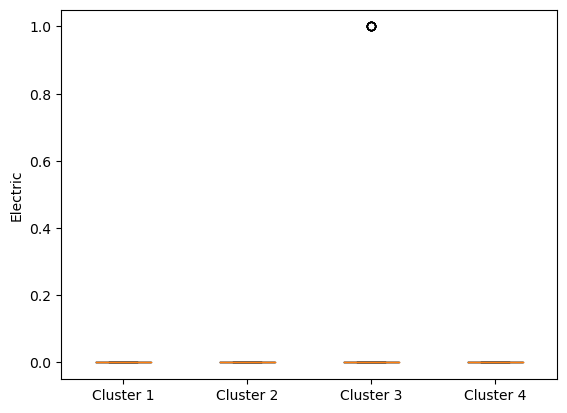

LPG


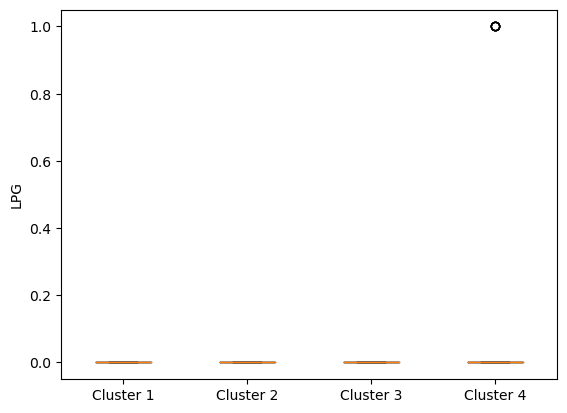

Hybrid


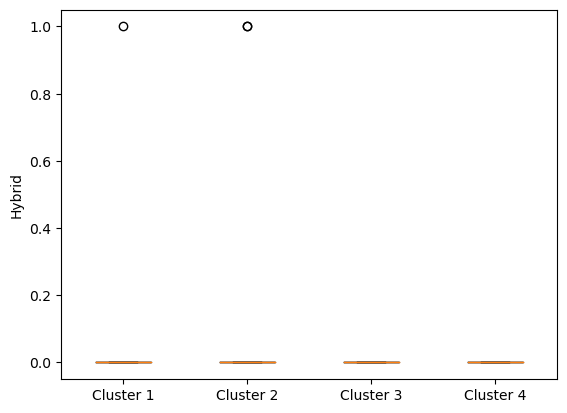

Cluster


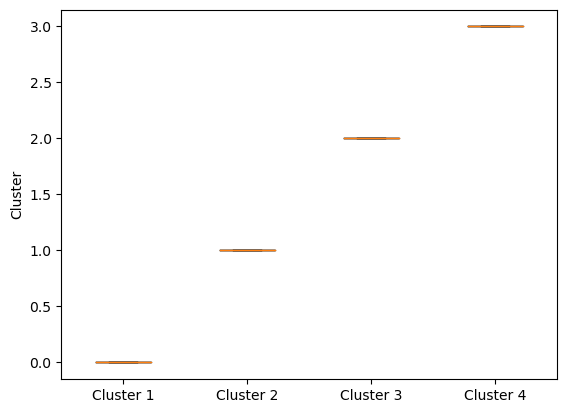

In [41]:
final_df['Cluster']=y_pred
# Groupped Boxplots
i=0
for col in final_df: 
    print(col) 
    plt.cla()
    plt.boxplot([final_df.iloc[:,i][final_df.Cluster==0].tolist(),
                 final_df.iloc[:,i][final_df.Cluster==1].tolist(),
                 final_df.iloc[:,i][final_df.Cluster==2].tolist(),
                final_df.iloc[:,i][final_df.Cluster==3].tolist(),],
                 labels=('Cluster 1','Cluster 2','Cluster 3','Cluster 4'))    
    plt.ylabel(col)
    plt.show()
    i=i+1

### 1.3 Hierarchical Clustering

In [42]:
final_df = df_encoded.copy()

In [43]:
#Select two columns
hc_df = final_df.iloc[:,[2,3,18]]
hc_df.describe()

,PRICE,YEAR,Max Torque (Nm)
count,1995.000000,1995.000000,1995.000000
mean,40577.393471,2016.576231,244.781538
std,46237.592530,3.176769,140.687001
min,1225.000000,2006.860460,0.000000
25%,12350.000000,2014.000000,115.000000
50%,21000.000000,2017.000000,200.000000
75%,48750.000000,2019.000000,350.000000
max,225898.274987,2022.000000,780.000000


In [44]:
# Convert dataframe into numpy arrays
X = hc_df.values

In [45]:
# Scaling the data so that all the features/attributes become comparable 
#scaler = StandardScaler() 
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) 

In [46]:
# The full distance matrix 
from scipy.spatial.distance import cdist
print(cdist(X_scaled, X_scaled))

[[0.         0.22380241 0.39760926 ... 0.26600063 0.56650776 0.11177462]
 [0.22380241 0.         0.22299467 ... 0.13280584 0.56997    0.19976587]
 [0.39760926 0.22299467 0.         ... 0.13284161 0.74464283 0.41314363]
 ...
 [0.26600063 0.13280584 0.13284161 ... 0.         0.67684925 0.29378842]
 [0.56650776 0.56997    0.74464283 ... 0.67684925 0.         0.48548029]
 [0.11177462 0.19976587 0.41314363 ... 0.29378842 0.48548029 0.        ]]


In [47]:
# Perform hierarchical/agglomerative clustering
Z = shc.linkage(X_scaled, method ='ward') 

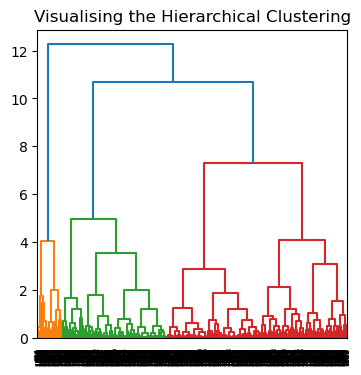

In [48]:
# Visualizing the hierarchical clustering through Dendrograms
plt.figure(figsize =(4, 4)) 
plt.title('Visualising the Hierarchical Clustering') 
Dendrogram = shc.dendrogram(Z)

In [49]:
# Build Agglomerative Clusting model with number of clusters set as 3
ac3 = AgglomerativeClustering(n_clusters = 3,linkage='ward')
# Fit the model to the data and predict the clusters
y_pred = ac3.fit_predict(X_scaled)

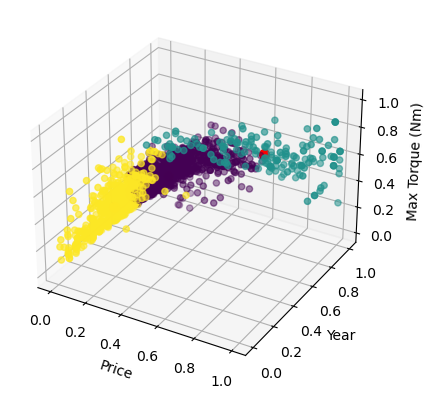

In [50]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter3D(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_pred)

# Find the unique cluster labels
unique_labels = np.unique(y_pred)

# Plot the mean or median values for each cluster
for label in unique_labels:
    cluster_points = X_scaled[y_pred == label]
    cluster_center = np.mean(cluster_points, axis=0)  # Use mean or median based on your preference
    ax.scatter3D(cluster_center[0], cluster_center[1], cluster_center[2], s=50, c='red')

# Set labels for the axes
ax.set_xlabel('Price')
ax.set_ylabel('Year')
ax.set_zlabel('Max Torque (Nm)')

# Show the plot
plt.show()

In [51]:
# Calculate the Silhouette Score 
silhouette_score(X_scaled, ac3.labels_)

0.34070698043201686

In [52]:
# We would like to evaluate the Silhouette Scores for different K, i.e. n_clusters (ranging from 2 to 11)
k_range = range(2,11)
silhouette_scores =[]

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='ward')
    silhouette_scores.append(silhouette_score(X_scaled, ac_i.fit_predict(X_scaled)))

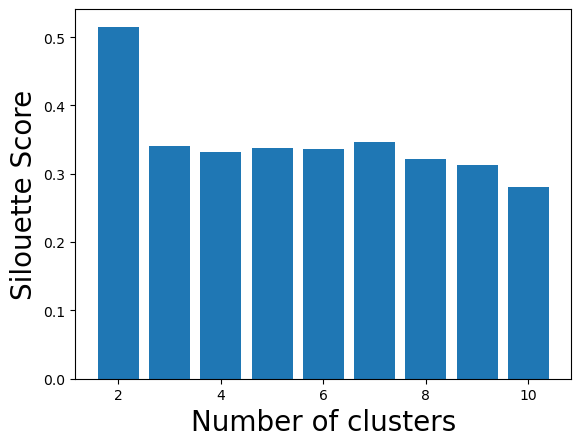

In [53]:
# Plotting Silhouette Scores using a bar graph to compare the results 
plt.bar(k_range, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('Silouette Score', fontsize = 20)
plt.show() 

In [54]:
# Building the final model with n_clusters = 2
ac2 = AgglomerativeClustering(n_clusters = 2,linkage='single')

#Single Linkage: calculates the distance between the closest points of two clusters.

# Fit the model to the data and predict the clusters
y_pred = ac2.fit_predict(X_scaled)

In [55]:
silhouette_score(X_scaled, ac2.fit_predict(X_scaled))

0.6115456239104401

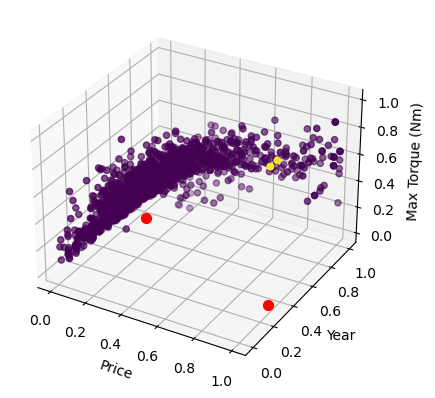

In [56]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter3D(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_pred)

# Find the unique cluster labels
unique_labels = np.unique(y_pred)

# Plot the mean or median values for each cluster
for label in unique_labels:
    cluster_points = X_scaled[y_pred == label]
    cluster_center = np.median(cluster_points, axis=0)
    ax.scatter3D(cluster_center[0], cluster_center[1], s=50, c='red')

# Set labels for the axes
ax.set_xlabel('Price')
ax.set_ylabel('Year')
ax.set_zlabel('Max Torque (Nm)')

# Show the plot
plt.show()

In [57]:
# Building the final model with n_clusters = 2
ac2 = AgglomerativeClustering(n_clusters = 2,linkage='ward')
# Fit the model to the data and predict the clusters
y_pred = ac2.fit_predict(X_scaled)

In [58]:
silhouette_score(X_scaled, ac2.fit_predict(X_scaled))

0.515265255694628

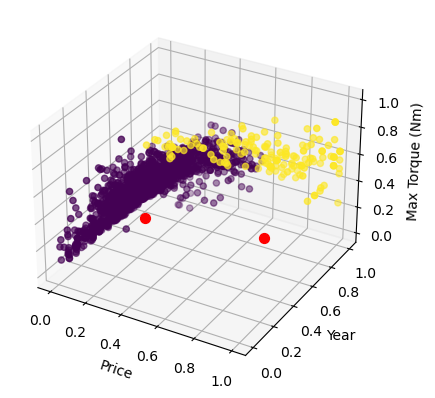

In [59]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter3D(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_pred)

# Find the unique cluster labels
unique_labels = np.unique(y_pred)

# Plot the mean or median values for each cluster
for label in unique_labels:
    cluster_points = X_scaled[y_pred == label]
    cluster_center = np.median(cluster_points, axis=0)
    ax.scatter3D(cluster_center[0], cluster_center[1], s=50, c='red')

# Set labels for the axes
ax.set_xlabel('Price')
ax.set_ylabel('Year')
ax.set_zlabel('Max Torque (Nm)')

# Show the plot
plt.show()

MAKE


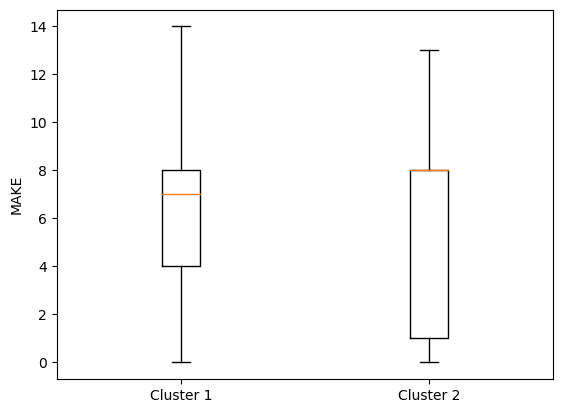

MODEL


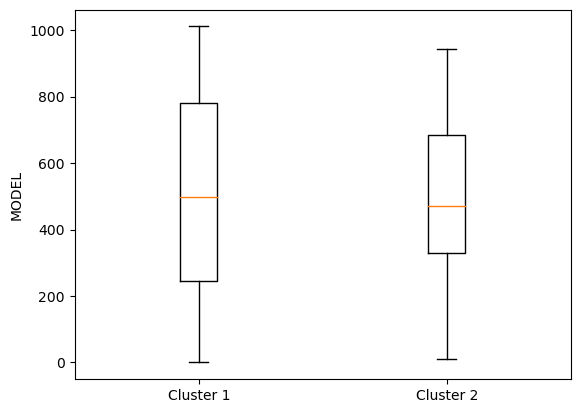

PRICE


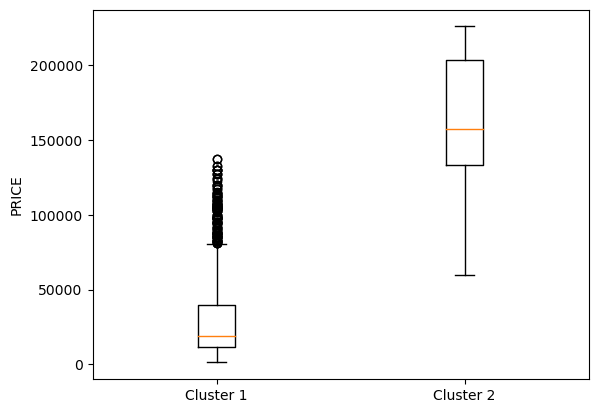

YEAR


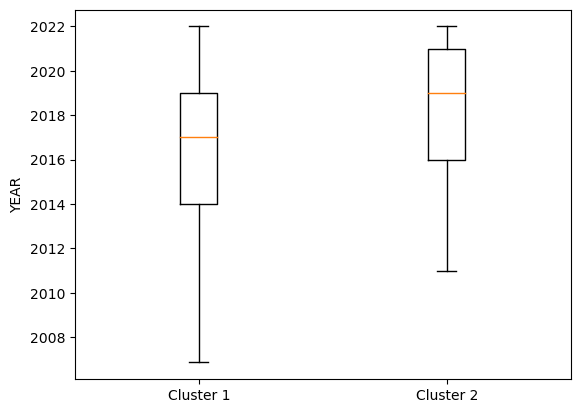

KILOMETER


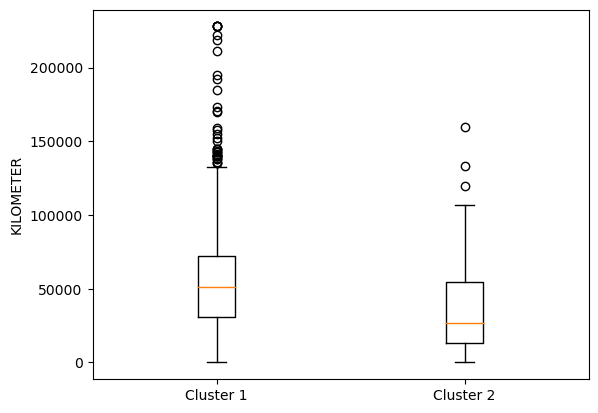

TRANSMISSION


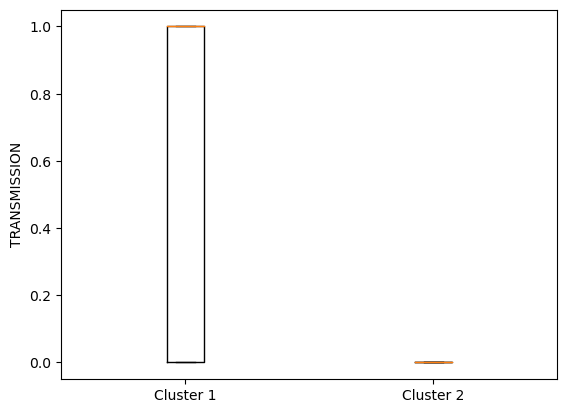

COLOR


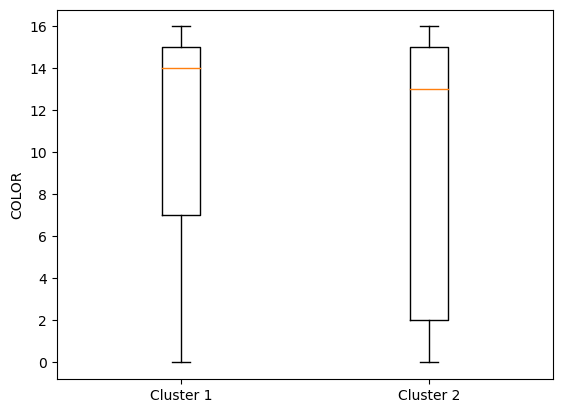

OWNER


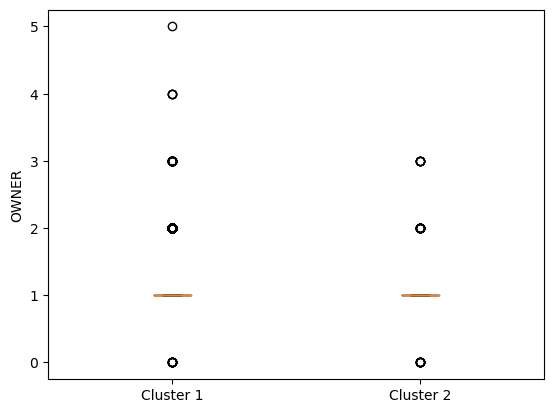

SELLER TYPE


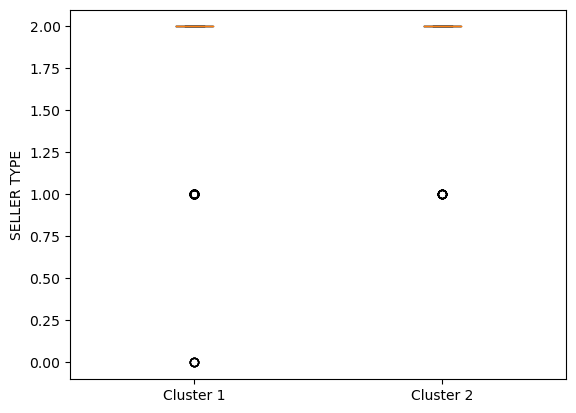

ENGINE CAPACITY


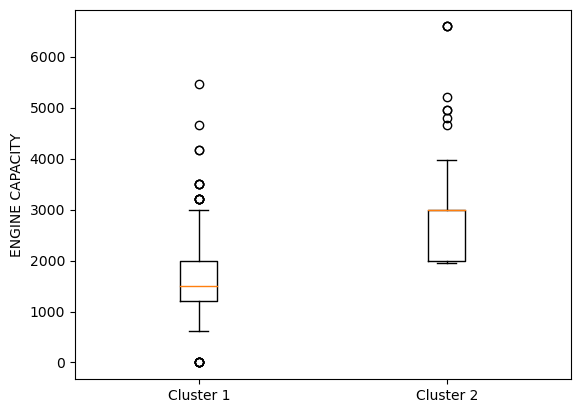

DRIVETRAIN


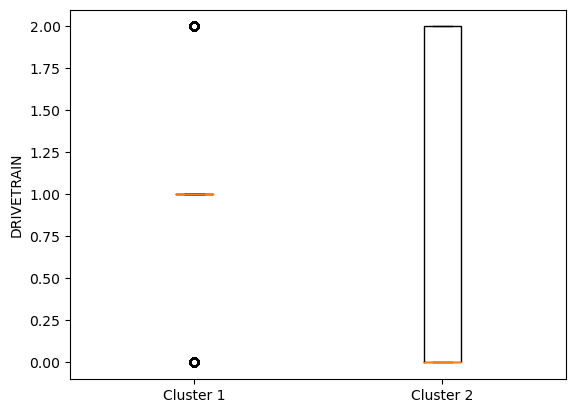

LENGTH


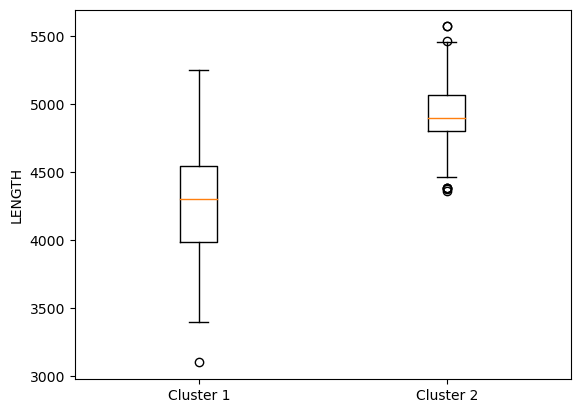

WIDTH


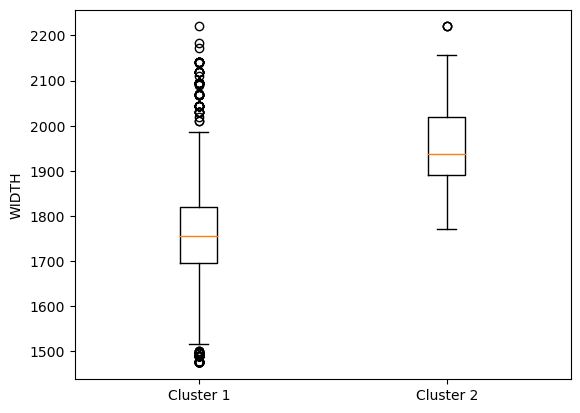

HEIGHT


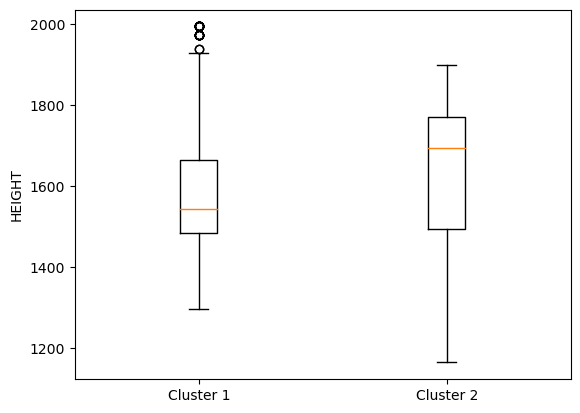

SEATING CAPACITY


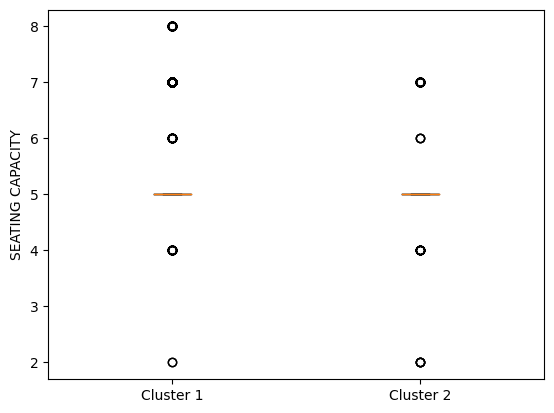

FUEL TANK CAPACITY


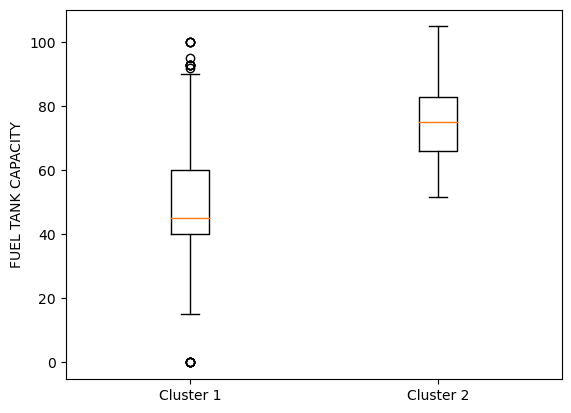

Max Power (bhp)


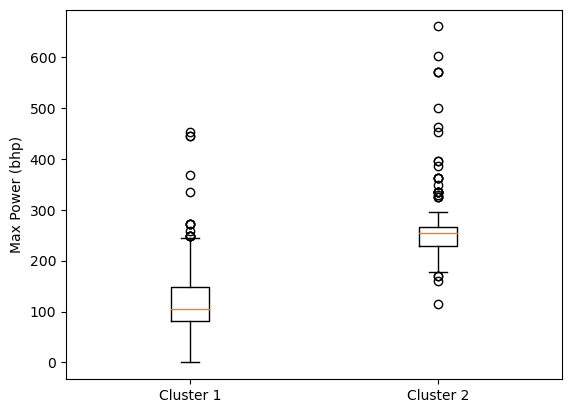

Max Power (rpm)


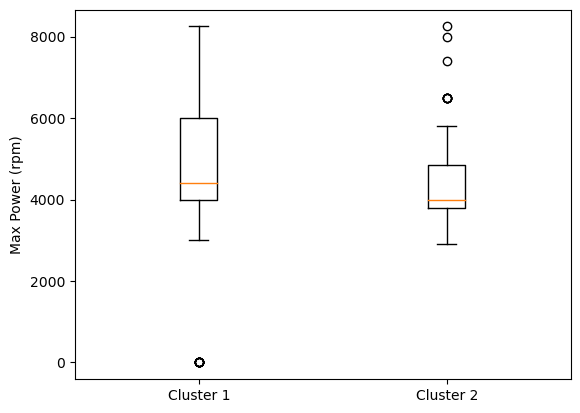

Max Torque (Nm)


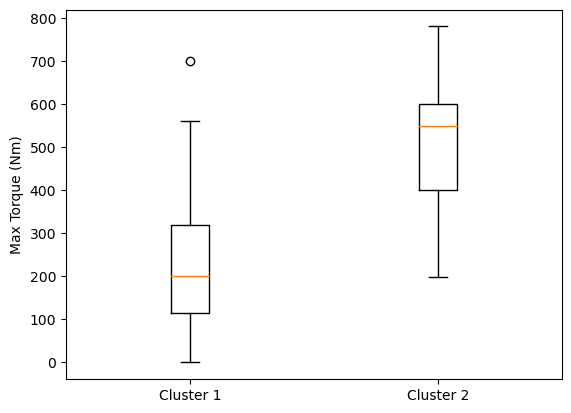

Max Torque (rpm)


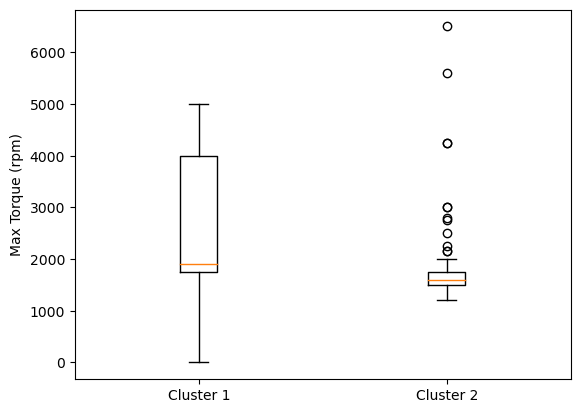

Diesel


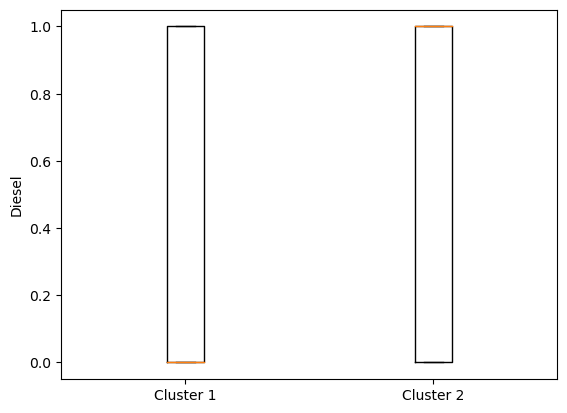

Petrol


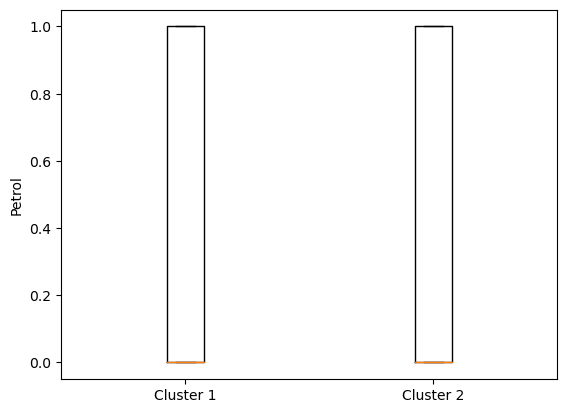

CNG


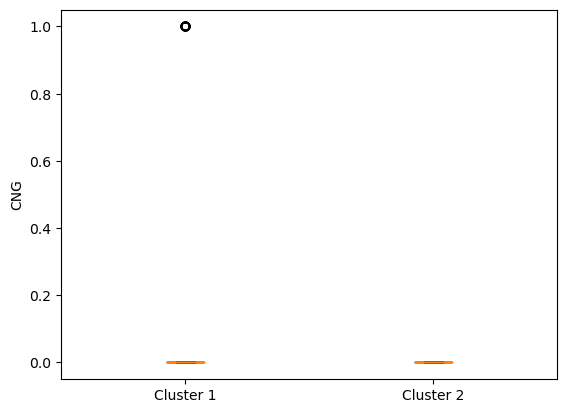

Electric


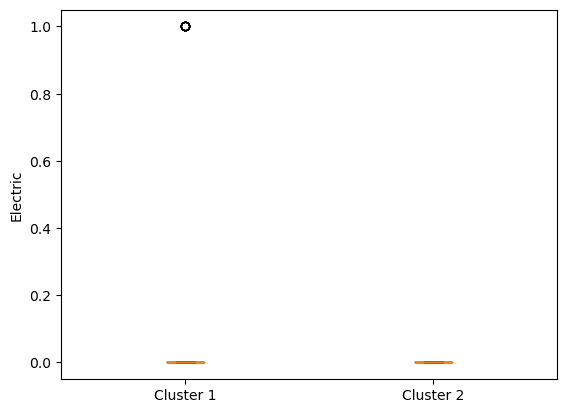

LPG


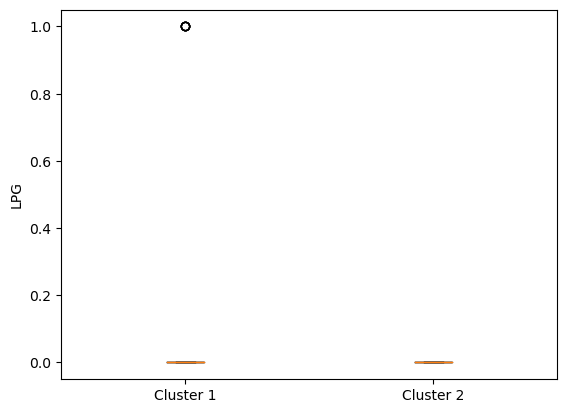

Hybrid


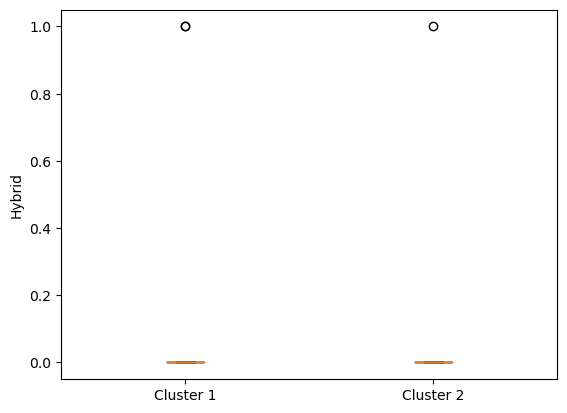

Cluster


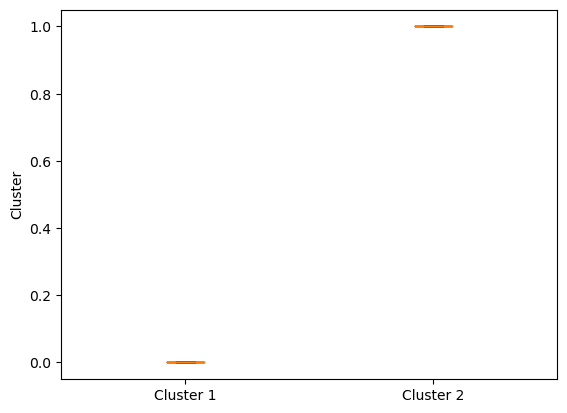

In [60]:
final_df['Cluster']=y_pred
# Groupped Boxplots
i=0
for col in final_df: 
    print(col) 
    plt.cla()
    plt.boxplot([final_df.iloc[:,i][final_df.Cluster==0].tolist(),
                 final_df.iloc[:,i][final_df.Cluster==1].tolist(),],
                 labels=('Cluster 1','Cluster 2'))    
    plt.ylabel(col)
    plt.show()
    i=i+1

## Final Model - KMeans clustering

In [61]:
final_df = df_encoded.copy()
df_3d = final_df.iloc[:,[2,3,18]]
X =df_3d.values
#scaler = StandardScaler() 
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Build the model using the optimal n_cluster
kmeans = KMeans(n_clusters=4, n_init=50, random_state=1)
# Fit the model and assign each data point to the cluster
kmeans.fit(X_scaled)
y_pred = kmeans.fit_predict(X_scaled) # fit and then predict

MAKE


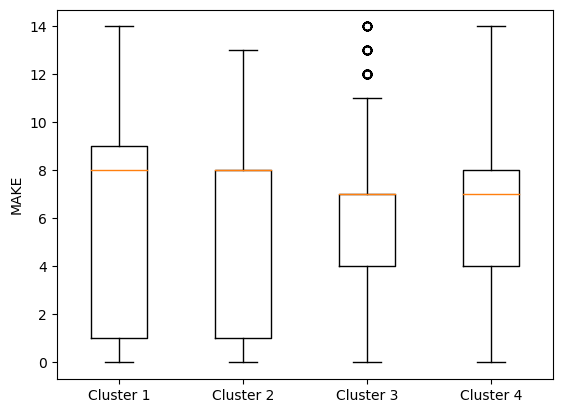

MODEL


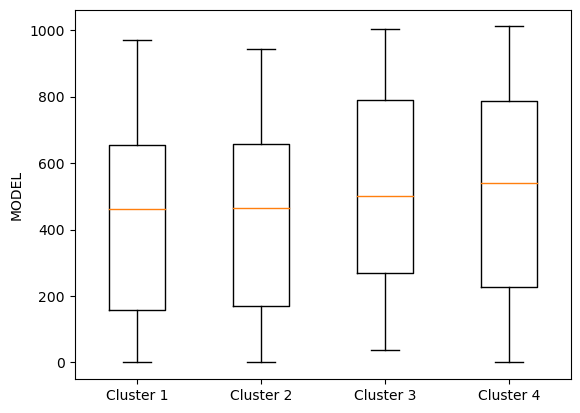

PRICE


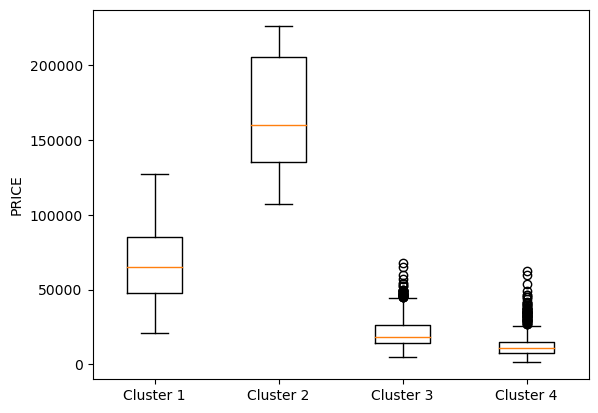

YEAR


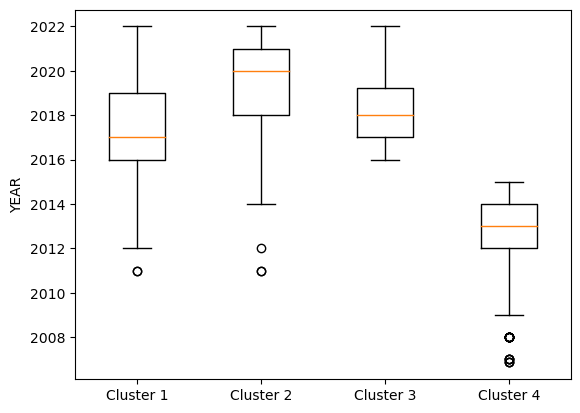

KILOMETER


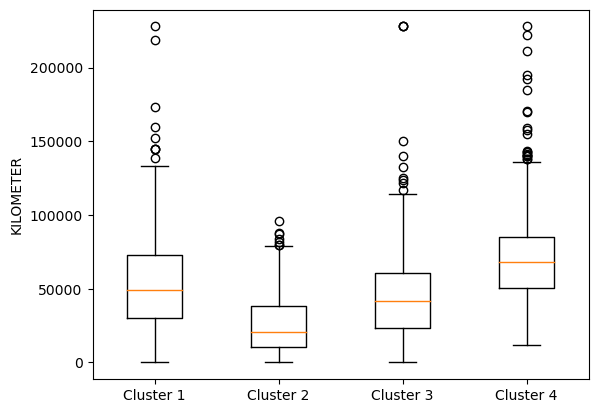

TRANSMISSION


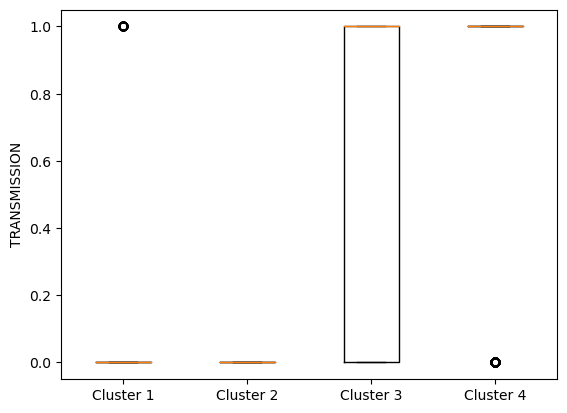

COLOR


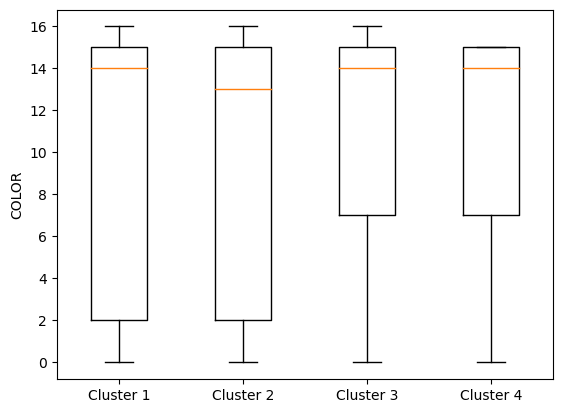

OWNER


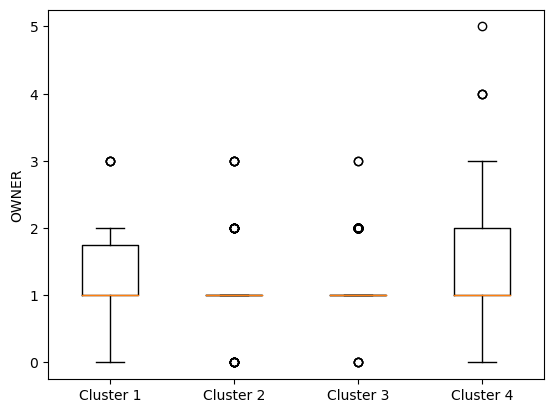

SELLER TYPE


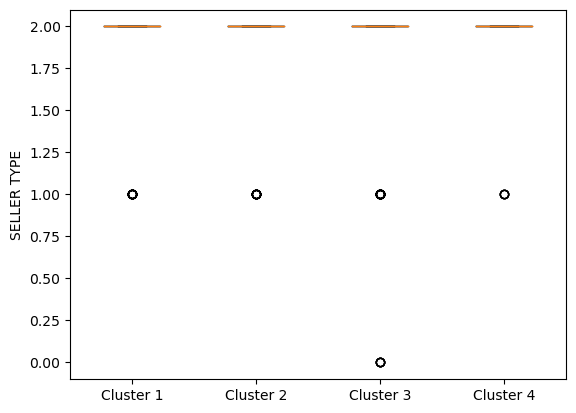

ENGINE CAPACITY


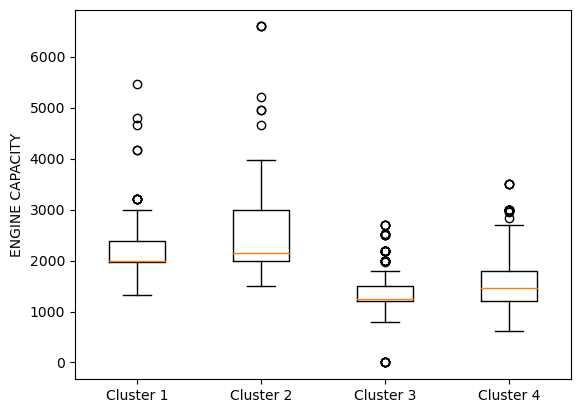

DRIVETRAIN


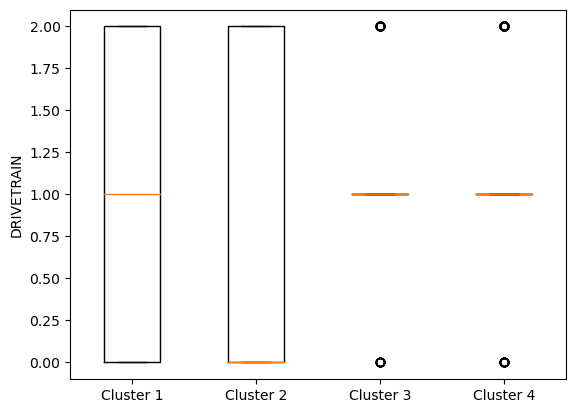

LENGTH


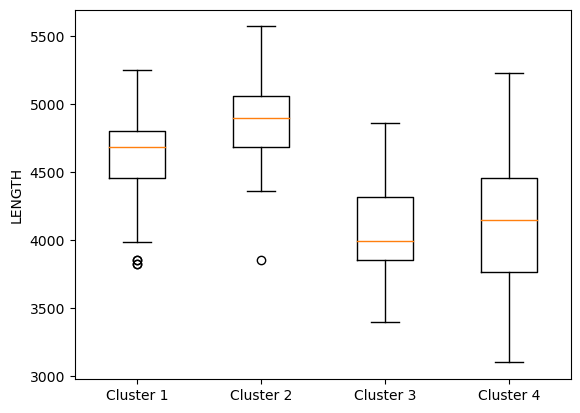

WIDTH


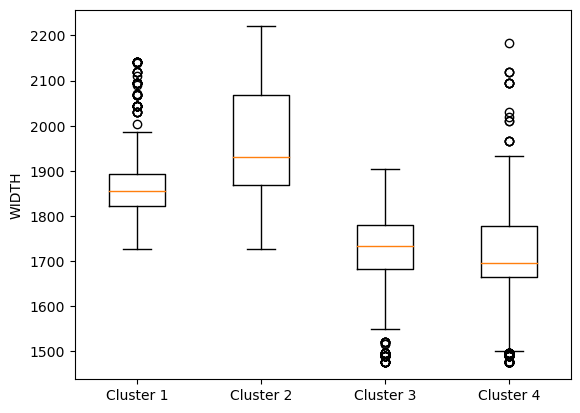

HEIGHT


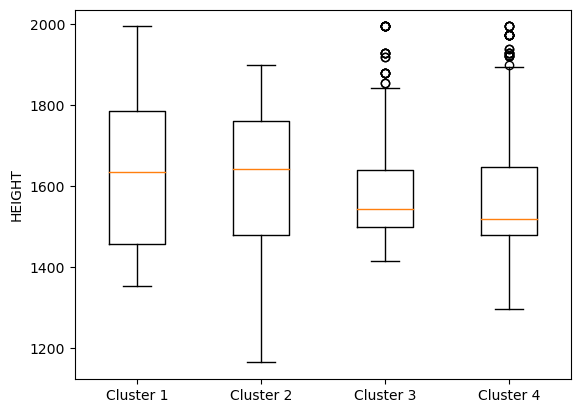

SEATING CAPACITY


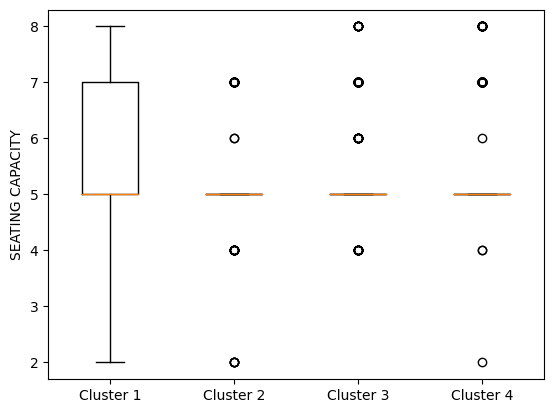

FUEL TANK CAPACITY


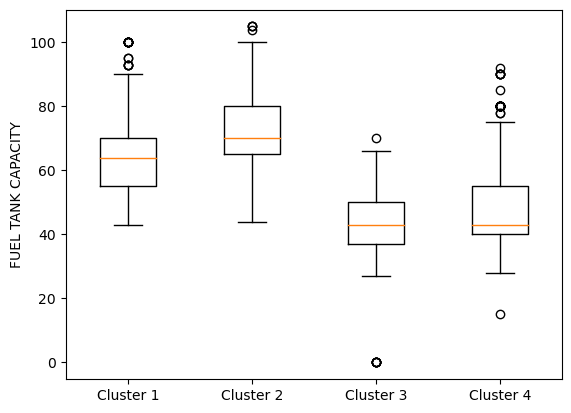

Max Power (bhp)


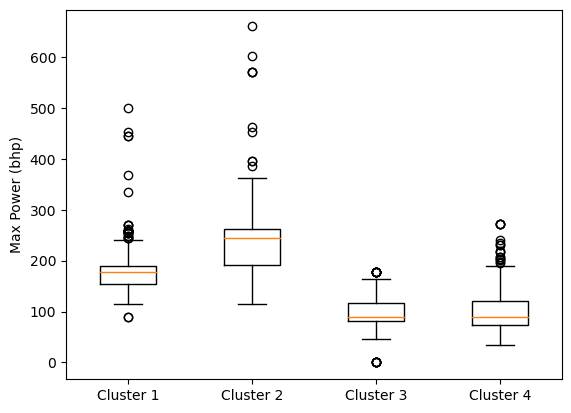

Max Power (rpm)


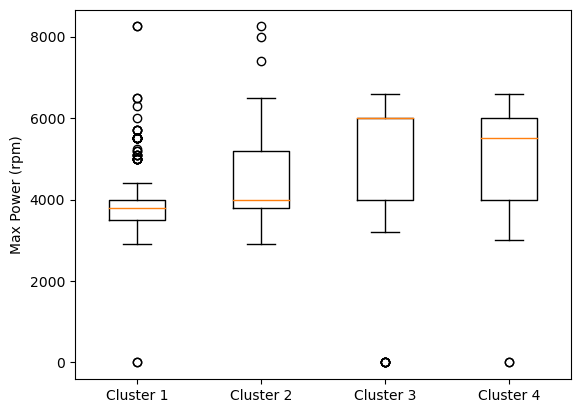

Max Torque (Nm)


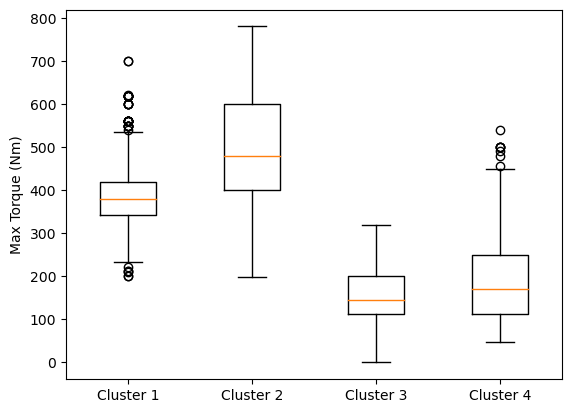

Max Torque (rpm)


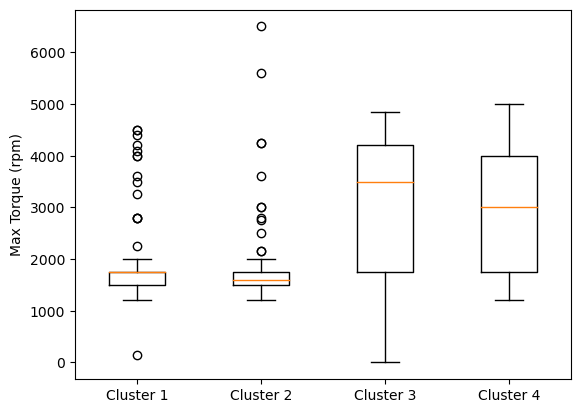

Diesel


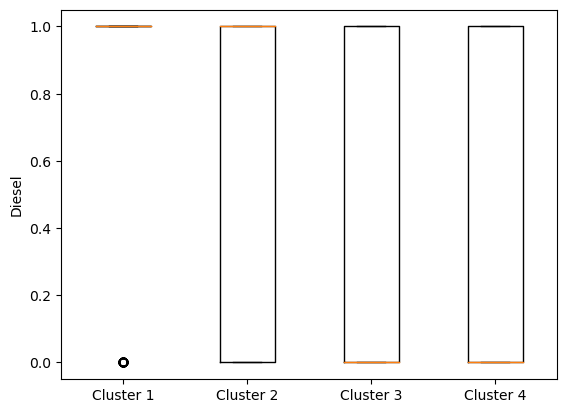

Petrol


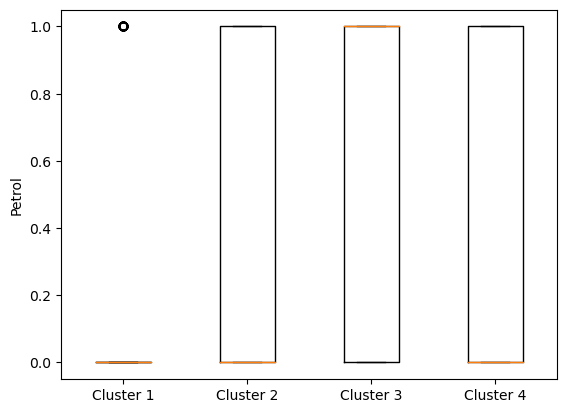

CNG


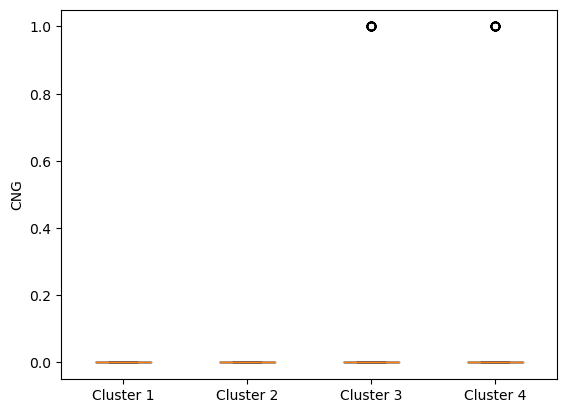

Electric


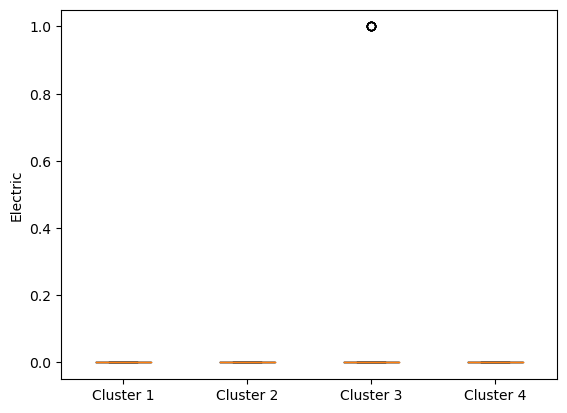

LPG


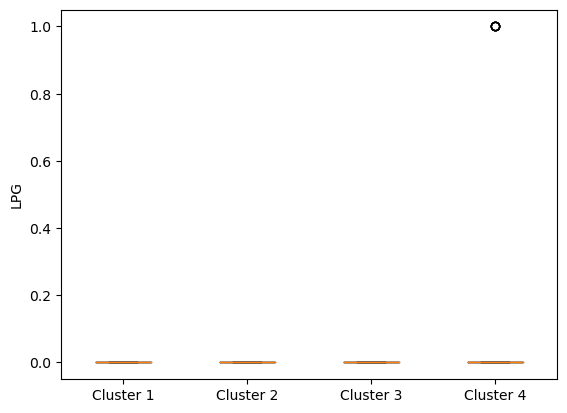

Hybrid


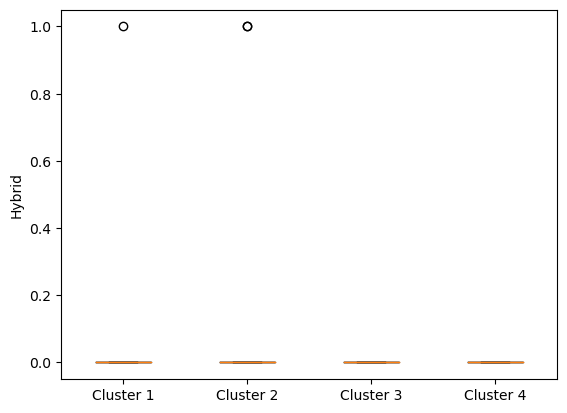

Cluster


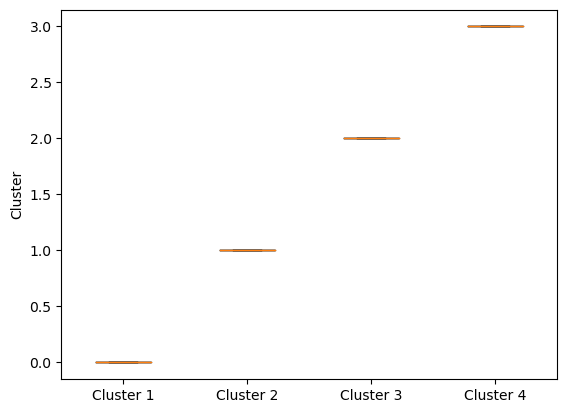

In [62]:
final_df['Cluster']=y_pred
# Groupped Boxplots
i=0
for col in final_df: 
    print(col) 
    plt.cla()
    plt.boxplot([final_df.iloc[:,i][final_df.Cluster==0].tolist(),
                 final_df.iloc[:,i][final_df.Cluster==1].tolist(),
                 final_df.iloc[:,i][final_df.Cluster==2].tolist(),
                final_df.iloc[:,i][final_df.Cluster==3].tolist(),],
                 labels=('Cluster 1','Cluster 2','Cluster 3','Cluster 4'))    
    plt.ylabel(col)
    plt.show()
    i=i+1